# Datas 

- Source for airports locations: https://openflights.org/data.html (file airlines.dat)
- Source for american airlines and flight scedules: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236


In [1]:
from visuMultiStream import *
print("1")
from intervals import *
print("2")
from structure import *
print("3")
from elemMSGraph import *
print("4")
from multiLayers import *
print("5")
from sortedcollection import *
print("6")
from matrices import *
print("7")
from random import *
print("8")
import seaborn as sns
print("9")

from tulip import tlp
print("10")
import scipy.linalg
print("finished")

sorted collection imported
1
2
3
4
5
6
7
8
9
10
finished


Echelle de temps : 1 mois

In [2]:
t0=0
tend=24*60*31

print(tend)

interval=Interval(t0,tend)

44640


In [3]:
def convertToMinutes(day,hour,minutes):
    return((day-1)*24*60+hour*60+minutes)



def readAirports(airportl):
    dicoAir={}
    f=open("planes/airports.dat","r",encoding="utf8")
    #print(f)
    lste=[]
    for line in f:
        line=line.replace("\"",'')
        tab=line.split(",")
        ida=tab[4]
        namea=tab[1]
        country=tab[3]
        print(ida)
        if (ida in dicoAir)==False and (ida in airportl):
            lat=tab[6]
            long=tab[7]
            print("oui")
            dicoAir[ida]=[namea,lat,long]
            lste.append(NodeT(ida,IntervalList([interval])))
    return(dicoAir,lste)
    

def readLinks():
    f=open("planes/jan1988.csv",'r')
    n=0
    em=LinkList([])
    careersl=[]
    airportl=[]
    airportPerLay={}
    for line in f:
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            date=int(tab[0].split("-")[2])
            career=tab[1]
            origin=tab[2]
            dest=tab[3]
            dept=int(tab[4][0]+tab[4][1])*60+int(tab[4][2]+tab[4][3])
            if len(tab[5])>0:
                arrival=int(tab[6][0]+tab[6][1])*60+int(tab[6][2]+tab[6][3])
                inter=Interval((date-1)*24*60+dept,(date-1)*24*60+arrival)
                if arrival<=dept:
                    inter=Interval((date-1)*24*60+dept,(date)*24*60+arrival)
                if not (career in careersl):
                    careersl.append(career)
                if not (origin in airportl):
                    airportl.append(origin)
                if not (dest in airportl):
                    airportl.append(dest)
                if (career in airportPerLay.keys())==False:
                    airportPerLay[career]=[]
                if not origin in airportPerLay[career]:
                    airportPerLay[career].append(origin)
                if not dest in airportPerLay[career]:
                    airportPerLay[career].append(dest)
                em.addLink(Link(IntervalList([inter]),NodeT(origin,IntervalList([interval])),[career],NodeT(dest,IntervalList([interval])),[career],directed=1),cond=0)
        n=n+1
    return(em,sorted(careersl),sorted(airportl),airportPerLay)

    
def readCarriers(carL):
    f=open("planes/L_UNIQUE_CARRIERS.csv","r")
    n=0
    liste=[]
    dicoCarreer={}
    for line in f :
        if n>0:
            line=line.replace("\"",'')
            tab=line.split(",")
            tab[-1]=tab[-1].rstrip("\n")
            code=tab[0]
            name=tab[1]
            if (code in liste) == False and (code in carL)==True :
                liste.append(code)
                dicoCarreer[code]=name
        n=n+1
    comp=Aspect("carrier",liste)
    return(comp,dicoCarreer)

# Principe :

In the datasets, they are to many airports and carriers (not american and unused). So we begin to read the links to know which airports and carriers are used and we then read their datasets to collect their detailed informations (stored into dictionnaries)

In [4]:
em,carL,airportl,airportperlay=readLinks()

dicoAir,nodes=readAirports(airportl)

laystr=LayerStruct([Aspect("compagnies",carL)])
listLay=[]

carriers,dicoCarreer =readCarriers(carL)

for l in carriers.giveElemLayer():
    nl=NodeTList([])
    for no in airportperlay[l]:
        nl.addNodeT(NodeT(no,IntervalList([interval])))
    listLay.append(Layer(laystr,[l],interval,nl))

layers=LayerList(listLay)

m=MultiStream(interval,laystr,layers,em,nodes=airportl)          

multi=m.extractML()

GKA
MAG
HGU
LAE
POM
WWK
UAK
GOH
SFJ
THU
AEY
EGS
HFN
HZK
IFJ
KEF
PFJ
RKV
SIJ
VEY
YAM
\N
\N
YAY
YAZ
YBB
YBC
YBG
YBK
YBL
YBR
YCB
YCD
YCG
YCH
YCL
YCO
YCT
YCW
YCY
YZS
YDA
YDB
\N
YDF
YDL
YDN
YDQ
YEG
YEK
YEN
YET
YEU
YEV
YFB
YFC
YFE
YFO
YFR
YFS
YGK
YGL
YGP
YGQ
YGR
YHB
YHD
YHI
YHK
YHM
YHU
YHY
YHZ
YIB
YIO
YJN
YJT
YKA
YKF
YKL
YKY
YKZ
YLD
YLJ
YLL
YLT
YLW
YMA
YMJ
YMM
YMO
YMW
YMX
YNA
YND
YNM
YOC
YOD
YOJ
YOW
YPA
YPE
YPG
\N
YPL
YPN
YPQ
YPR
YPY
YQA
YQB
YQF
YQG
YQH
YQK
YQL
YQM
YQQ
YQR
YQT
YQU
YQV
YQW
YQX
YQY
YQZ
YRB
YRI
YRJ
YRM
YRT
YSB
YSC
YSJ
YSM
YSR
YSU
YSY
YTE
YTH
YTR
YTS
YTZ
YUB
YUL
YUT
YUX
YUY
YVC
YVG
YVM
YVO
YVP
YVQ
YVR
YVT
YVV
YWA
YWG
YWK
YWL
YWY
YXC
YXD
YXE
YXH
YXJ
YXL
YXP
YXR
YXS
YXT
YXU
YXX
YXY
YYB
YYC
YYD
YYE
YYF
YYG
YYH
YYJ
YYL
YYN
YYQ
YYR
YYT
YYU
YYW
YYY
YYZ
YZD
YZE
YZF
YZH
YZP
YZR
YZT
YZU
YZV
YZW
YZX
ZFA
ZFM
QLD
BUJ
BJA
ALG
DJG
\N
\N
VVZ
\N
TMR
GJL
MZW
\N
AAE
CZL
TEE
HRM
TID
\N
TIN
CFK
TAF
TLM
ORN
BFW
MUW
AZR
BSK
ELG
GHA
HME
INZ
TGR
LOO
TMX
OGX
IAM
COO
OUA
BOY
ACC
TML
\N
NYI
TKD
ABJ
BYK
DJ

IGR
AOL
MCS
PSS
PRQ
SLA
JUJ
ORA
\N
ELO
OYA
\N
RCQ
UZU
EHL
CRD
EQS
REL
VDM
PMY
\N
PUD
RGA
RGL
USH
ULA
PMQ
RZA
BHI
CSZ
OVR
GPO
OYO
\N
MDQ
NQN
PEH
RSA
BRC
TDL
VLG
CUT
CPC
CDJ
\N
\N
AQA
AJU
AFL
ARU
BEL
BGX
PLU
BFH
\N
BSB
BAU
BVB
BPG
CAC
\N
CNF
CGR
XAP
CLN
CCM
\N
CAW
CMG
CWB
CRQ
CXJ
CGB
CZS
PPB
MAO
JCR
\N
IGU
FLN
FEN
\N
FOR
GIG
GJM
GYN
\N
GRU
GUJ
ATM
ITA
ITB
IOS
IPN
ITR
IMP
\N
JDF
JPA
JOI
CPV
VCP
LAJ
LIP
LDB
LAZ
\N
MAB
MEU
MGF
MOC
PLL
MCZ
MCP
MVF
\N
MNX
NVT
GEL
NAT
OYK
POA
PHB
POO
PFB
PET
PNZ
PNB
PMG
PVH
RBR
REC
SDU
RAO
SNZ
SJK
SLZ
CGH
SJP
SSZ
SSA
TMT
THE
TFF
TRQ
TEC
\N
TBT
TUR
SJL
PAV
URG
UDI
UBA
VAG
BVH
VIX
\N
QPS
ARI
BBA
\N
CCH
CJC
YAI
PUQ
GXQ
IQQ
SCL
ANF
WPR
FFU
LSQ
WPU
CCP
IPC
ZOS
VLR
QRC
TNM
LSC
\N
PZS
PMC
WCH
ZAL
ATF
\N
OCC
CUE
GPS
GYE
\N
\N
\N
\N
LTX
MRR
XMS
MCH
\N
MEC
\N
\N
PVO
\N
UIO
\N
ETR
SNC
\N
\N
\N
TPC
TUA
ASU
AYO
CIO
\N
ESG
PIL
AXM
PUU
ELB
BGA
BOG
BAQ
BSC
BUN
CUC
CTG
CLO
TCO
CZU
EJA
FLA
GIR
GPI
\N
IBE
IPI
APO
MCJ
LET
EOH
MGN
MTR
MVP
MZL
NVA
OCV
OTU
\N
PCR
PEI
PTX
PPN
PSO
PVA

NIO
KRZ
BSU
TSH
LJA
PFR
OUK
GMZ
BTE
KBS
KEN
OXB
SMW
VIL
ESU
EUN
NDR
Cape Verde
Cape Verde
BCO
BEI
DSE
DEM
GDE
GOR
ABK
MTF
TIE
ALU
BSA
MGQ
GLK
BUO
AAC
ATZ
ASV
LKG
MYD
NYK
SRX
TOB
MJI
LAQ
ATB
UYL
PZU
BKZ
TKQ
LDI
MUZ
SHY
TBO
RUA
ULU
DIU
ABR
ABY
AHN
ALM
ALO
oui
ALW
APN
ATY
BFD
BFF
BKW
BQK
BRL
CEC
CGI
CIU
CKB
CLM
CMX
DDC
DUJ
EAU
oui
EKO
EWB
FAY
oui
GGW
GRI
HOT
HTS
oui
KIO
IRK
JMS
LAR
LBE
LBF
LEB
LMT
LNS
LWT
LYH
oui
MKG
MLS
MSL
OTH
OWB
PIB
PIH
PIR
PLN
PSM
RDG
RHI
RKS
RUT
SBP
SHR
SLK
SLN
SMX
TUP
UIN
VCT
VLD
WRL
YKM
oui
ECN
RJL
IDY
ANE
LTT
JSY
PEV
\N
SOB
AOT
QSR
CVU
BNX
USQ
KSY
SFQ
KCM
AJI
ADF
ISE
EDO
SZF
ILZ
GDT
MDS
SLX
AZS
JBQ
PBR
AAZ
UTK
AHS
PEU
MIJ
CYW
CUA
GUB
JAL
CTD
ONX
JQE
PLP
TTQ
BCL
\N
PBP
PJM
SYQ
\N
JEE
PAX
\N
TND
COX
ATC
TBI
CRI
PID
AIU
MGS
MHX
MUK
MOI
PYE
ICI
PTF
KDV
MNF
MFJ
NGI
LKB
LBS
TVU
KXF
RTA
SVU
EUA
HPA
Tonga
NTT
VBV
IUE
FUT
MXS
APK
AHE
AUQ
UAP
UAH
MTV
SLH
TOH
EAE
CCV
LOD
SSR
PBJ
LPM
LNB
MWF
LNE
NUS
ZGU
RCL
SON
TGH
ULB
VLS
SWJ
OLJ
AUY
AWD
DLY
FTA
IPA
TGJ
BMY
ILP
FBD
\N
AJF
W

TNH
SZV
\N
\N
\N
\N
\N
\N
LII
NTI
WSR
DTB
\N
MEQ
BUW
KAZ
MNA
SGQ
BUU
\N
ILA
OKL
KOX
CMQ
WMB
RCM
DCN
KNO
AMN
\N
HMY
\N
\N
EMT
FAH
IXT
\N
KRQ
QKX
\N
\N
SSF
\N
JAS
\N
MRF
ALE
BQE
CZA
BUY
CCB
\N
EKI
\N
CUB
\N
\N
GDC
\N
HVS
\N
SZT
DU9
\N
\N
\N
\N
RIH
\N
LEE
\N
\N
\N
PPY
DIQ
EIK
ERD
BWX
ERL
\N
CNO
\N
\N
\N
HTR
\N
BWW
\N
\N
\N
PRB
\N
PKX
\N
HAF
HCJ
\N
WJF
CJF
GUZ
UBT
\N
\N
BOX
\N
\N
\N
\N
\N
\N
\N
QUG
\N
\N
\N
TNW
\N
FYJ
\N
\N
\N
\N
PZL
LPF
KJH
HPG
ZQZ
YIE
HNY
AHJ
WOS
\N
IGT
ASN
GMU
\N
NGD
TOI
\N
ETS
\N
EFG
KGW
NDN
BNM
ALX
PKT
GPN
\N
\N
\N
\N
\N
DOH
HZP
\N
\N
\N
\N
\N
HDE
PTT
\N
\N
LXN
\N
CBF
OKK
\N
\N
\N
\N
GBG
GUY
\N
\N
\N
\N
IDP
\N
\N
\N
BBC
PRX
CFV
\N
GXY
\N
OEL
FET
LGD
SZY
MPO
UKT
YBA
\N
BNG
\N
\N
OFK
\N
\N
\N
\N
\N
\N
TFL
\N
TPF
\N
\N
BZC
\N
ITP
\N
REZ
\N
\N
\N
KBN
IKL
AIR
JRN
JIA
VLP
JUA
CCX
\N
TGQ
CQA
MTG
BMB
\N
APQ
FLB
PCS
BNC
BNB
MTP
VPZ
DRV
SXK
MLZ
PDU
ATI
\N
HSM
SWH
TTL
KWB
KOO
AOU
\N
\N
SQX
LDM
RHV
OHS
KCF
RZS
\N
TMF
IFU
KZF
OGU
YKO
\N
BUT
TLI
\N
\N
\N
\N
TQL
\N
\N
JIC
\N
BPL
FYN

In [5]:
m2=m.cut(Interval(0,24*60))
m2=m2.extractLayers([["G4"]])
m2.drawMS("avions1988.fig")

In [6]:
print(dicoAir)

{'SPN': ['Saipan International Airport', '15.119', '145.729004'], 'GUM': ['Antonio B. Won Pat International Airport', '13.4834003448', '144.796005249'], 'ROR': ['Babelthuap Airport', '7.36731', '134.544236'], 'YAP': ['Yap International Airport', '9.49891', '138.082993'], 'STT': ['Cyril E. King Airport', '18.337299346923828', '-64.97339630126953'], 'STX': ['Henry E Rohlsen Airport', '17.701900482177734', '-64.79859924316406'], 'SJU': ['Luis Munoz Marin International Airport', '18.4393997192', '-66.0018005371'], 'GFK': ['Grand Forks International Airport', '47.949299', '-97.176102'], 'BOS': ['General Edward Lawrence Logan International Airport', '42.36429977', '-71.00520325'], 'OAK': ['Metropolitan Oakland International Airport', '37.721298', '-122.221001'], 'OMA': ['Eppley Airfield', '41.3032', '-95.894096'], 'OGG': ['Kahului Airport', '20.8986', '-156.429993'], 'ICT': ['Wichita Eisenhower National Airport', '37.649899', '-97.433098'], 'MCI': ['Kansas City International Airport', '39.29

## Build the tulip file

The differents layers corresponding to the different carriers are drawn in different colors. We build different subgraphs corresponding to each company.

This is very useful for vizualisation (download tulip http://tulip.labri.fr/TulipDrupal/ ) to open the graph (double click on the graph on the bottom left and chose the "geographic view"

In [7]:
def makeGraph(m,airportl,carL,dicoAir,airportperlay):
    graph=tlp.newGraph()
    latitude=graph.getDoubleProperty("latitude")
    longitude=graph.getDoubleProperty("longitude")
    name = graph.getStringProperty("nameCity")
    code = graph.getStringProperty("code")
    couche = graph.getStringVectorProperty("compagnie")
    color = graph.getColorProperty("viewColor")
    k=len(carL)
    colList=[(randint(0,255),randint(0,255),randint(0,255)) for i in range(k)]
    for n in range(len(airportl)):
        graph.addNode()
        no=graph.nodes()[n]
        code[no]=airportl[n]
        listeAttributs=dicoAir[airportl[n]]
        name[no]=listeAttributs[0]
        latitude[no]=float(listeAttributs[1])
        longitude[no]=float(listeAttributs[2])
    n=0
    for lay in m.giveLayers().giveLayers():
        car=lay.giveLayerLabel()[0]
        sub=graph.addSubGraph(car)
        nliste=airportperlay[car]
        for node1 in nliste :
            no=graph.nodes()[airportl.index(node1)]
            sub.addNode(no)
        #print(car,len(sub.nodes()))
    for e in m.giveLinks().giveListOfLinks():
        n1=graph.nodes()[airportl.index(e.giveNodes()[0].giveNode())]
        n2=graph.nodes()[airportl.index(e.giveNodes()[1].giveNode())]
        graph.addEdge(n1,n2)
        ed=graph.edges()[n]
        n=n+1
        couche[ed]=e.giveLabel()[2]
        color[ed]=colList[carL.index(e.giveLabel()[2][0])]
        sub=graph.subGraphs()[carL.index(e.giveLabel()[2][0])]
        car=e.giveLabel()[2][0]
        codenode=e.giveNodes()[0].giveNode()
        n1=sub.nodes()[airportperlay[car].index(codenode)]
        n2=sub.nodes()[airportperlay[e.giveLabel()[2][0]].index(e.giveNodes()[1].giveNode())]
        sub.addEdge(ed)
    tlp.saveGraph(graph,"grapheplanes1988.tlp")
    return(graph)

graph=makeGraph(m,airportl,carL,dicoAir,airportperlay)

We can then use the library "tulip" to compute classical measures: 

- page ranking: 

In [8]:
pagerank=graph.getDoubleProperty("pageRank")
params = tlp.getDefaultPluginParameters('Page Rank', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Page Rank', pagerank, params)
pr=[]
for n in graph.getNodes():
    pr.append(pagerank[n])

- betweenness centrality:

In [9]:
betweenness=graph.getDoubleProperty("betweeness")
params = tlp.getDefaultPluginParameters('Betweenness Centrality', graph)
params["directed"]=True

success = graph.applyDoubleAlgorithm('Betweenness Centrality', betweenness, params)
bt=[]
for n in graph.getNodes():
    bt.append(betweenness[n]) 

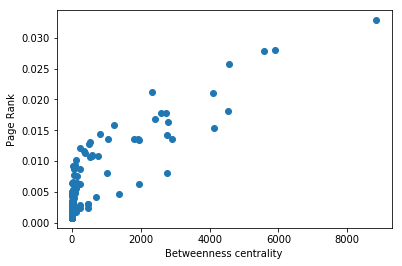

In [10]:
axes = plt.gca()
plt.plot(bt,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('Betweenness centrality')
plt.savefig("prVSbc.pdf")
plt.show()


# Intrication

We compute the Burt's matrix which is:

$\begin{pmatrix}
P(1) & P(1|2) & P(1|3) & \dots & P(1|n)\\
P(2|1) & P(2) & P(2|3) & \dots & P(2|n)\\
\vdots & \vdots & \ddots\\
\dots & \dots & \dots & \dots & P(n)
\end{pmatrix}$

$P(i)$ is the probability, taking a flight, that it exists in the compagny $C_i$.

$P(i|j)$ is the probability, taking a flight in $c_j$, that $c_i$ has the same flight.

In [11]:
matintric=multi.computeIntricationMatrixBurt()

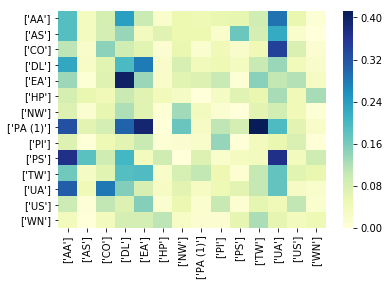

In [12]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matintric),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("intricplanes.pdf")
plt.show()


We compute its maximal left eigenvalue and the eigenvector associated. If the matrix isn't reductible (if we have all the nodes in the same connex component), this eigenvalue is unique and the eigenvector has all its coefficients of the same sign.

In [13]:
valp,vectp=valeurPropreMax(np.transpose(matintric),1000)

We draw the eigenvector ordered:

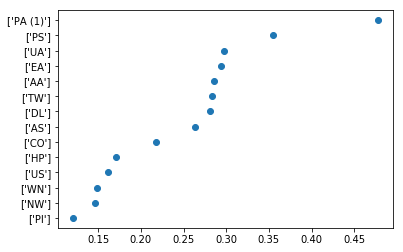

In [14]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectp[lablist.index(lab)])
vectpo,labo=l.listsSorted()

plt.plot(labo,vectpo,'o')
plt.savefig("intricscoresplanes.pdf")
plt.show()

 # Covariance

In [15]:
matcov=multi.computeCovariance()

N= 1737


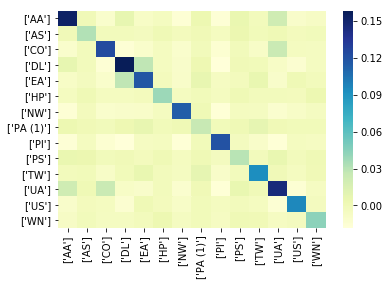

In [16]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcov),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [17]:
valpcov,vectpcov=valeurPropreMax(np.transpose(matcov),1000)
print(valpcov)

0.19030025987388857


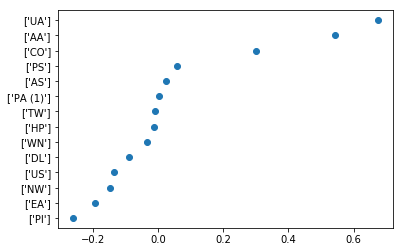

0.19030025987388857


In [18]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpcov[lablist.index(lab)])
vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("covscoresplanes.pdf")
plt.show()

print(valpcov)

## Test: covariance valeur propre minimale

In [19]:
vp,vectpro=np.linalg.eig(matcov)

taux=[matintric[i][i] for i in range(len(matcov))]

print(vp,vectpro)

for i in range(len(vectpro)):
    esp=0
    for j in range(len(vectpro[i])):
        esp=esp+vectpro[i][j]*taux[j]
    print("esp",esp, "lambda", vp[i])
    
esp_glob=0
for i in range(len(taux)):
    esp_glob=esp_glob+taux[i]
print("esperance globale=",esp_glob)
print("variance globale = ", )

[0.19030026 0.18890775 0.14603063 0.13336175 0.11233932 0.10808587
 0.09374763 0.09236984 0.07152315 0.02339345 0.02564463 0.04043782
 0.03587862 0.03293823] [[-0.54366602 -0.31850148 -0.64557906  0.08703121  0.16116037  0.18848815
  -0.19100987 -0.19099652  0.14949006  0.0363006  -0.0633371  -0.08346812
   0.07372791  0.06397725]
 [-0.02241292  0.00518428 -0.00633095  0.0142257  -0.00618984 -0.00730269
   0.04957274  0.00930762 -0.12261974  0.02247798 -0.6586063   0.42410366
  -0.32335794  0.51270382]
 [-0.29900098  0.25966662  0.52873073 -0.17275279  0.11620994  0.48213864
  -0.13316948 -0.41568005  0.24807298  0.03171441 -0.03766379 -0.07280959
   0.08209283  0.1458783 ]
 [ 0.09206387 -0.78581702  0.26923369 -0.07215699 -0.33634437  0.26151112
   0.19354748  0.14079103  0.20124799  0.01892184 -0.03991692 -0.06602227
   0.06012467  0.08424982]
 [ 0.19374255 -0.36444896  0.20766311 -0.21299553  0.38027791 -0.40164934
  -0.6298217  -0.15984249 -0.04119522  0.07782366 -0.03049803 -0.014

## Tests precision

In [20]:
matprec=np.linalg.inv(matcov)
#for i in range(len(matprec)):
#    matprec[i][i]=0

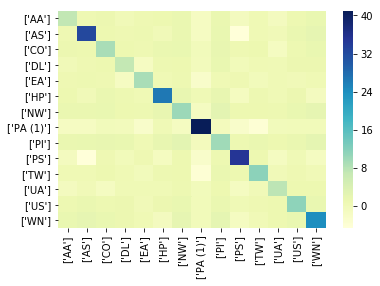

In [21]:
lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matprec),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()

In [22]:
valpprec,vectpprec=valeurPropreMax(np.transpose(matprec),1000)
print(1/valpprec)

0.023393447426606487


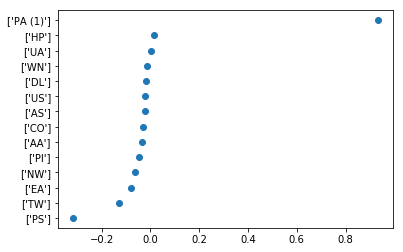

42.7470129461403


In [23]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpprec[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpprec)

## Next VP

["['AA']", "['AS']", "['CO']", "['DL']", "['EA']", "['HP']", "['NW']", "['PA (1)']", "['PI']", "['PS']", "['TW']", "['UA']", "['US']", "['WN']"]


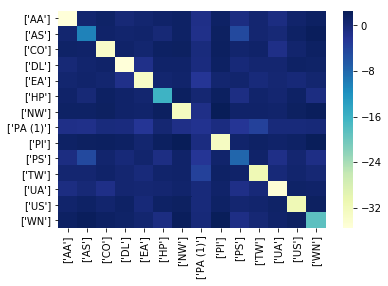

In [24]:
matprec2=matprec-valpprec*np.eye(14)

lablist=multi.giveLayersLabels()
print(lablist)
sns_plot=sns.heatmap(np.transpose(matprec2),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
fig = sns_plot.get_figure()
fig.savefig("matcov.pdf")
plt.show()


In [25]:
valpp2,vectpp2=valeurPropreMax(np.transpose(matprec2),1000)

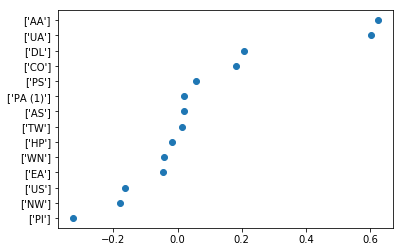

80.23381257408984


In [26]:
l=SortedCollection(iterable=lablist,key = lambda lab: vectpp2[lablist.index(lab)])


vectcova,labo2=l.listsSorted()

plt.plot(labo2,vectcova,'o')
#plt.savefig("precscoresplanes.pdf")
plt.show()

print(valpp2+valpprec)

# Random walks

A step: to go on, a passenger will chose among all the possibles links he can take. Each link corresponds to a company and a destination.

For instance, from `['Montgomery Regional (Dannelly Field) Airport', '32.30059814', '-86.39399719']`
we can reach with the same probability:
```
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with Endeavor Air Inc.
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101'] with SkyWest Airlines Inc.
['Ronald Reagan Washington National Airport', '38.8521', '-77.037697'] with PSA Airlines Inc.
['Dallas Fort Worth International Airport', '32.896801', '-97.038002'] with Envoy Air
```


In [27]:
def step(pos0,airportl,m,t,prints=False):
    if prints==True:
        print(dicoAir[pos0])
    bloque=False
    possibleDest={}
    listDest=[]
    car="none"
    for link in m.giveLinks().giveListOfLinks():
        if link.giveNodes()[0].giveNode()==pos0:
            dest=link.giveNodes()[1].giveNode()
            if not dest in listDest:
                listDest.append(dest)
                possibleDest[dest]=[]
            possibleDest[dest].append(link)
            #print(link.giveLabel())
            #print(dicoAir[(link.giveLabel()[1])],dicoCarreer[link.giveLabel()[2][0]])
    if len(listDest)==0:
        bloque=True
        pos1=pos0
        print("no neighbours")
        t1=t
    else:
        #print("----------------------------")
        li=randint(0,len(listDest)-1)
        operListe=possibleDest[listDest[li]]
        link0i=randint(0,len(operListe)-1)
        link0=operListe[link0i]
        #link0.printLink()
        #print(link0.giveLabel())
        pos1=link0.giveNodes()[1].giveNode()
        intervalsL=link0.giveIntervals()
        i=0
        car=link0.giveLabel()[2][0]
        while i<len(intervalsL) and intervalsL[i].begining()<t :
            i=i+1
        if i==len(intervalsL):
            bloque=True
            t1=t
            print("timeout")
        else:
            t1=intervalsL[i].end()
    return(pos1,t1,car,bloque)

pos0=airportl[randint(0,len(airportl)-1)]
step(pos0,airportl,m,0)

('LAN', 968, 'NW', False)

From that, we compute the random walk: 

In [28]:
def randomWalk(airportl,m,t,collect="coverage",prints=False,boucles=1):
    pos0=airportl[randint(0,len(airportl)-1)]
    t=0
    bloque=False
    i=0
    b=0
    if collect=="coverage":
        airports=np.array([0 for i in range(len(airportl))])
        compagnies=np.array([0 for i in range(len(carL))])
    if collect=="firstTimeToReach":
        airports=np.array([tend for i in range(len(airportl))])
        compagnies=np.array([tend for i in range(len(carL))])
    while bloque==False and b<boucles:
        if prints==True:
            print(pos0,t)
        pos0,t,car,bloque=step(pos0,airportl,m,t,prints=prints)
        if bloque==True:
            b=b+1
            t=0
            bloque=False
        if collect=="coverage":
            airports[airportl.index(pos0)]=airports[airportl.index(pos0)]+1
            compagnies[carL.index(car)]=compagnies[carL.index(car)]+1
        if collect=="firstTimeToReach":
            if airports[airportl.index(pos0)]==tend:
                airports[airportl.index(pos0)]=t
            if compagnies[carL.index(car)]== tend:
                compagnies[carL.index(car)]=t
        i=i+1
    return([pos0,t,airports,compagnies])

randomWalk(airportl,m,0,prints=True,boucles=10)

ORD 0
["Chicago O'Hare International Airport", '41.9786', '-87.9048']
RNO 723
['Reno Tahoe International Airport', '39.49909973144531', '-119.76799774169922']
SFO 980
['San Francisco International Airport', '37.61899948120117', '-122.375']
RDM 2027
['Roberts Field', '44.2541008', '-121.1500015']
MFR 2089
['Rogue Valley International Medford Airport', '42.37419891357422', '-122.87300109863281']
DEN 3979
['Denver International Airport', '39.861698150635', '-104.672996521']
JFK 5290
['John F Kennedy International Airport', '40.63980103', '-73.77890015']
MSY 5609
['Louis Armstrong New Orleans International Airport', '29.99340057373047', '-90.25800323486328']
DCA 6460
['Ronald Reagan Washington National Airport', '38.8521', '-77.037697']
CLT 6583
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
HTS 6674
['Tri-State/Milton J. Ferguson Field', '38.36669922', '-82.55799866']
PIT 6892
['Pittsburgh International Airport', '40.49150085', '-80.23290253']
HTS 71

MSP 8225
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
GRB 8340
['Austin Straubel International Airport', '44.48509979248047', '-88.12960052490234']
DTW 9163
['Detroit Metropolitan Wayne County Airport', '42.212398529052734', '-83.35340118408203']
CWA 9255
['Central Wisconsin Airport', '44.7775993347', '-89.6668014526']
MSP 9325
['Minneapolis-St Paul International/Wold-Chamberlain Airport', '44.882', '-93.221802']
BNA 9782
['Nashville International Airport', '36.1245002746582', '-86.6781997680664']
LAX 11342
['Los Angeles International Airport', '33.94250107', '-118.4079971']
ELP 12160
['El Paso International Airport', '31.80719948', '-106.3779984']
IAH 13725
['George Bush Intercontinental Houston Airport', '29.984399795532227', '-95.34140014648438']
CLT 14223
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
LAX 15055
['Los Angeles International Airport', '33.94250107', '-118.4079971']
MEM 15518
['Memphis Int

SFO 26805
['San Francisco International Airport', '37.61899948120117', '-122.375']
DEN 27018
['Denver International Airport', '39.861698150635', '-104.672996521']
MCI 27994
['Kansas City International Airport', '39.2976', '-94.713898']
LAX 28338
['Los Angeles International Airport', '33.94250107', '-118.4079971']
SLC 28510
['Salt Lake City International Airport', '40.78839874267578', '-111.97799682617188']
MSO 28715
['Missoula International Airport', '46.91630173', '-114.0910034']
BIL 29458
['Billings Logan International Airport', '45.807701110839844', '-108.54299926757812']
DEN 29560
['Denver International Airport', '39.861698150635', '-104.672996521']
timeout
FAR 0
['Hector International Airport', '46.92070007324219', '-96.81580352783203']
DEN 1912
['Denver International Airport', '39.861698150635', '-104.672996521']
LNK 2246
['Lincoln Airport', '40.85100173950195', '-96.75920104980469']
SUX 2445
['Sioux Gateway Col. Bud Day Field', '42.40259933', '-96.38439941']
RAP 2693
['Rapid Cit

FWA 5600
['Fort Wayne International Airport', '40.97850037', '-85.19509888']
CAK 6895
['Akron Canton Regional Airport', '40.916099548339844', '-81.44219970703125']
CLE 7151
['Cleveland Hopkins International Airport', '41.4117012024', '-81.8498001099']
CLT 7955
['Charlotte Douglas International Airport', '35.2140007019043', '-80.94309997558594']
TYS 8047
['McGhee Tyson Airport', '35.81100082', '-83.9940033']
ATL 8146
['Hartsfield Jackson Atlanta International Airport', '33.6367', '-84.428101']
IAD 10904
['Washington Dulles International Airport', '38.94449997', '-77.45580292']
FLL 11419
['Fort Lauderdale Hollywood International Airport', '26.072599', '-80.152702']
LGA 12314
['La Guardia Airport', '40.77719879', '-73.87259674']
RDU 12740
['Raleigh Durham International Airport', '35.877601623535156', '-78.7874984741211']
CLE 12838
['Cleveland Hopkins International Airport', '41.4117012024', '-81.8498001099']
FLL 13665
['Fort Lauderdale Hollywood International Airport', '26.072599', '-80.1

['STT',
 0,
 array([ 0,  3,  0,  0,  0,  0,  1,  9,  0,  9,  0,  4,  1,  0,  0,  0,  1,
         1,  0,  0,  0,  1,  0,  0,  3,  0,  2,  0,  2,  1,  0,  3,  6,  0,
         1,  2,  0,  0,  0,  0,  1,  1,  4,  7,  1,  2,  1,  0,  0,  1,  0,
         2,  1,  1,  2,  5,  5, 10,  9,  0,  0,  1,  7,  0,  0,  2,  0,  0,
         0,  4,  0,  2,  1,  2,  2,  0,  0,  4,  1,  0,  1,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  0,  2,  0,  2,
         9,  6,  2,  0,  1,  1,  0,  2,  0,  0,  1,  2,  7,  2,  0,  1,  0,
         4, 10,  1,  0,  1,  5,  1,  0,  1,  1,  0,  0,  0,  1,  6,  1,  0,
         3,  2,  1,  1,  0,  0,  5,  0,  2,  0,  0,  1,  0,  0,  0,  1,  4,
         3,  0,  1,  3,  0,  1,  1,  5,  1, 11,  1,  0,  5,  4,  2,  0,  1,
         2,  8,  1,  1,  5,  0,  0,  0,  0,  0,  2,  2,  1,  0,  1,  7,  2,
         4,  0,  1,  0,  0,  4,  3,  3,  2,  0,  2,  1,  0,  2,  3,  4,  0,
         0,  2,  4,  0,  5,  1,  1,  0,  2,  6,  1,  0,  1,  1,  0,  0,  0,


We compute then a great amount of random walks, collecting several informations:

- the coverage

In [29]:
covAirports=np.array([0 for i in range(len(airportl))])
covCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    covAirports=np.add(covAirports,airports)
    covCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


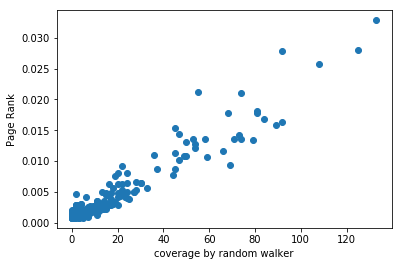

In [30]:
axes = plt.gca()
plt.plot(covAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('coverage by random walker')
plt.savefig("prVSrw.pdf")
plt.show()

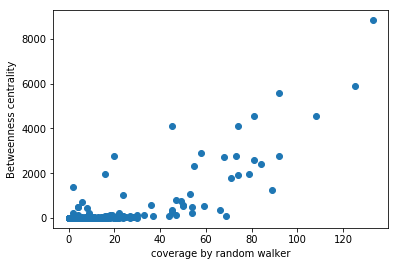

In [31]:
axes = plt.gca()
plt.plot(covAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('coverage by random walker')
plt.savefig('bcVScovrw.pdf')
plt.show()

[455 111 390 461 307 146 437  46 435  66 257 390 338 144]
[0.2857499  0.26347504 0.21743697 0.28103674 0.29438903 0.17099168
 0.14674622 0.47728966 0.12058115 0.35532966 0.28368856 0.29699277
 0.16127463 0.14809491]


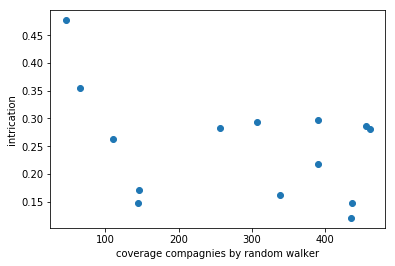

In [32]:
print(covCompagnies)
print(vectp)
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
plt.show()


- the first time to reach

In [33]:
ftrAirports=np.array([0 for i in range(len(airportl))])
ftrCompagnies=np.array([0 for i in range(len(carL))])
airports=np.array([0 for i in (airportl)])
t=0
for i in range(10):
    print("randomwalk n", i)
    vect=randomWalk(airportl,m,t,collect="firstTimeToReach",boucles=10)
    airports=vect[2]
    compagnies=vect[3]
    ftrAirports=np.add(covAirports,airports)
    ftrCompagnies=np.add(covCompagnies,compagnies)

randomwalk n 0
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 1
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 2
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 3
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 4
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 5
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 6
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 7
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 8
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
randomwalk n 9
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout
timeout


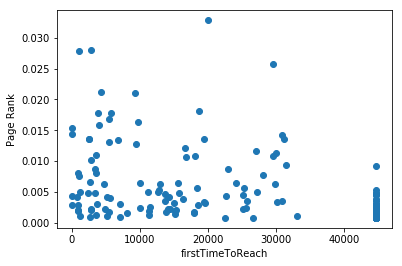

In [34]:
axes = plt.gca()
plt.plot(ftrAirports,pr,'o')
axes.set_ylabel('Page Rank')
axes.set_xlabel('firstTimeToReach')
plt.show()

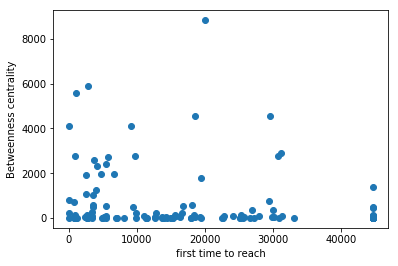

In [35]:
axes = plt.gca()
plt.plot(ftrAirports,bt,'o')
axes.set_ylabel('Betweenness centrality')
axes.set_xlabel('first time to reach')
plt.show()

In [36]:
nnodes=[121,102,70,68,145,101,90,120,18,134,43,95,239,108,85,103,87]
nlinks=[488,721,326,362,834,368,522,614,62,419,366,325,1358,715,1378,335,661]

['AA', 'AS', 'CO', 'DL', 'EA', 'HP', 'NW', 'PA (1)', 'PI', 'PS', 'TW', 'UA', 'US', 'WN']


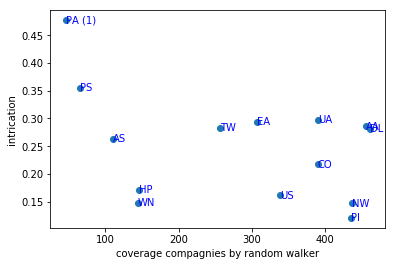

In [37]:
axes=plt.gca()
plt.plot(covCompagnies,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(carL)
ni=0
for i in carL:
    text = axes.text(covCompagnies[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()


[3.760330578512397, 1.088235294117647, 5.571428571428571, 6.779411764705882, 2.117241379310345, 1.4455445544554455, 4.855555555555555, 0.38333333333333336, 24.166666666666668, 0.4925373134328358, 5.976744186046512, 4.105263157894737, 1.4142259414225942, 1.3333333333333333]


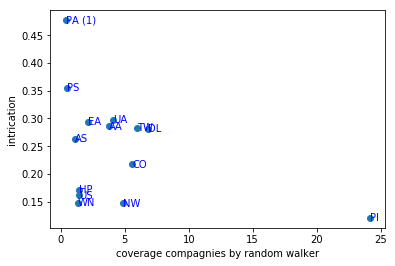

In [38]:
cov2=[covCompagnies[i]/nnodes[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('coverage compagnies by random walker')
print(cov2)
ni=0
for i in carL:
    text = axes.text(cov2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[-0.9323770491803278, -0.1539528432732316, -1.196319018404908, -1.2734806629834254, -0.36810551558752996, -0.3967391304347826, -0.8371647509578544, -0.0749185667752443, -7.016129032258065, -0.1575178997613365, -0.7021857923497268, -1.2, -0.24889543446244478, -0.2013986013986014]


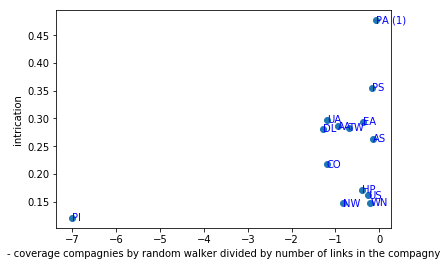

In [39]:
cov3=[-covCompagnies[i]/nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('- coverage compagnies by random walker divided by number of links in the compagny')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[-0.9323770491803278, -0.1539528432732316, -1.196319018404908, -1.2734806629834254, -0.36810551558752996, -0.3967391304347826, -0.8371647509578544, -0.0749185667752443, -7.016129032258065, -0.1575178997613365, -0.7021857923497268, -1.2, -0.24889543446244478, -0.2013986013986014]


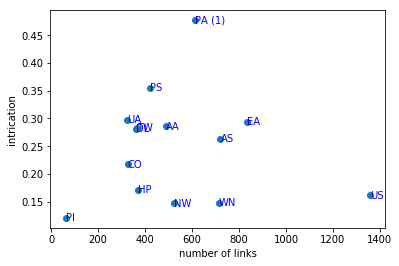

In [40]:
nlinks2=[nlinks[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(nlinks2,vectp,'o')
axes.set_ylabel('intrication')
axes.set_xlabel('number of links')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nlinks2[ni],vectp[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Covariance

[ 0.54389783  0.02240914  0.29881179 -0.09149156 -0.19347708 -0.01229385
 -0.14961546  0.00330226 -0.26179934  0.05729299 -0.01068798  0.67373488
 -0.13732904 -0.03633183]


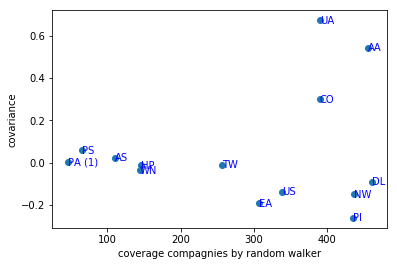

In [41]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpcov,'o')
axes.set_ylabel('covariance')
axes.set_xlabel('coverage compagnies by random walker')
print(vectpcov)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpcov[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

## Precision

[455, 111, 390, 461, 307, 146, 437, 46, 435, 66, 257, 390, 338, 144]


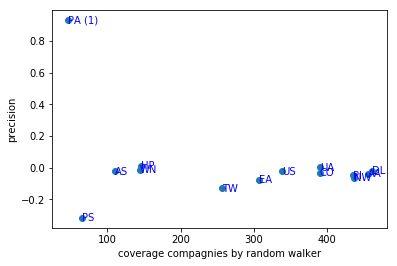

In [42]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(cov3,vectpprec,'o')
axes.set_ylabel('precision')
axes.set_xlabel('coverage compagnies by random walker')
print(cov3)
ni=0
for i in carL:
    text = axes.text(cov3[ni],vectpprec[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

# Probas de transition

L'idée est de calculer, une fois arrivé à un aéroport $a$ à un temps $t_0$, la probabilité de prendre les vols à suivre en fonction du temps qu'il faut attendre pour cela. On considère qu'on peut prendre un lien qu'un certain temps après le temps $t2$ étudié, dans ce qu'on appellera une fenêtre. On va favoriser les vols partant le plus tôt. La probabilité de prendre un vol partant pour $b$ à $t$ sera donc: $p((t,a,b))=(t2-t)/c \times \delta_{t0<t<t2}$, avec $\sum_{\forall (t,a,b)\in E} p((t,a,b))=1$.

En calculant cela pour tous les aéroports de départ, nous obtenons une matrice d'adjacence entre les aéroports. Nous pouvons donc en tirer un vecteur propre pour la valeur propre 1, et un classement des aéroports les plus "influents", ceux dans lesquels il est le plus probable qu'un voyageur aléatoire atterrisse.


In [43]:
pt1,pt2=m.calculMatriceProbaTransition(7*60,60*24)
#m.printMS()
print(pt1)
matAirp=np.array(pt1)
matAirp=np.transpose(matAirp)
print(len(pt1))
valptrans,vectptrans=valeurPropreMax(matAirp,100000)

['EA']
4
['EA']
4
['EA']
4
['US']
12
['NW']
6
['NW']
6
['NW']
6
['UA']
11
['UA']
11
['US']
12
['US']
12
['US']
12
['US']
12
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['DL']
3
['UA']
11
['UA']
11
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['CO']
2
['HP']
5
['HP']
5
['WN']
13
['WN']
13
['WN']
13
['DL']
3
['DL']
3
['PS']
9
['PS']
9
['WN']
13
['DL']
3
['WN']
13
['WN']
13
['WN']
13
['EA']
4
['EA']
4
['AA']
0
['AA']
0
['UA']
11
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['DL']
3
['DL']
3
['TW']
10
['TW']
10
['TW']
10
['EA']
4
['EA']
4
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['PI']
8
['PI']
8
['EA']
4
['EA']
4
['US']
12
['PI']
8
['PI']
8
['US']
12
['US']
12
['NW']
6
['N

['DL']
3
['DL']
3
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['PS']
9
['PS']
9
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['AA']
0
['AA']
0
['AA']
0
['US']
12
['US']
12
['US']
12
['WN']
13
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PI']
8
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['DL']
3
['TW']
10
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['WN']
13
['WN']
13
['WN']
13
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PI']
8
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['WN']
13
['WN']
13
['WN']
13
['AA']
0
['AA']
0
['AA']
0
['NW']
6
['NW']
6
['NW']
6

8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['UA']
11
['UA']
11
['UA']
11
['EA']
4
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['US']
12
['AA']
0
['AA']
0
['PA (1)']
7
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['TW']
10
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['TW']
10
['TW']
10
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['AA']
0
['PI']
8
['PI']
8
['PI']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['NW']
6
['TW']
10
['TW']
10
['

11
['CO']
2
['UA']
11
['UA']
11
['PI']
8
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['TW']
10
['TW']
10
['TW']
10
['TW']
10
['TW']
10
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0

['NW']
6
['NW']
6
['NW']
6
['NW']
6
['US']
12
['US']
12
['US']
12
['US']
12
['PI']
8
['PI']
8
['UA']
11
['UA']
11
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['CO']
2
['CO']
2
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['NW']
6
['NW']
6
['NW']
6
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['CO']
2
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['AA']
0
['AA']
0
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['EA']
4
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['EA']
4
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['CO']
2
['AA']
0
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['PI']
8
['AA']
0
['AA']
0
['AA']
0
['CO']
2
['CO']
2
['CO']

['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['TW']
10
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['PI']
8
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['PI']
8
['PI']
8
['CO']
2
['CO']
2
['CO']
2
['PI']
8
['PI']
8
['PI']
8
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['AA']
0
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
[

['UA']
11
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['EA']
4
['EA']
4
['EA']
4
['DL']
3
['NW']
6
['NW']
6
['NW']
6
['EA']
4
['EA']
4
['EA']
4
['PA (1)']
7
['PA (1)']
7
['NW']
6
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['CO']
2
['CO']
2
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['DL']
3
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['AS']
1
['AS']
1
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['UA']
11
['UA']
11
['UA']
11
['EA']
4
['TW']
10
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['HP']


3
['TW']
10
['TW']
10
['TW']
10
['TW']
10
['TW']
10
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['CO']
2
['DL']
3
['EA']
4
['EA']
4
['NW']
6
['NW']
6
['TW']
10
['US']
12
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['TW']
10
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['UA']
11
['UA']
11
['UA']
11
['HP']
5
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['NW']
6
['NW']
6
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['TW']
10
['TW']
10
['TW']
10
['TW']
10
['WN']
13
['WN']
13
['WN']
13
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['AA']
0
['AA']
0
['AA']
0
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['NW']
6
['PI']
8
['PI']
8
['NW']
6
['DL']
3
['DL']
3
['DL']
3


11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['AS']
1
['AS']
1
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['AS']
1
['AS']
1
['AS']
1
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PS']
9
['AS']
1
['AS']
1
['AS']
1
['HP']
5
['HP']
5
['PS']
9
['UA']
11
['UA']
11
['CO']
2
['DL']
3
['DL']
3
['DL']
3
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['PS']
9
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['DL']
3
['DL']
3
['DL']
3
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['WN']
13
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['TW']
10
['WN']
13
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['EA']
4
['TW']
10
['WN']
13
['NW']
6
['NW']
6
['NW']
6
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA'

['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['PI']
8
['DL']
3
['DL']
3
['EA']
4
['TW']
10
['AA']
0
['DL']
3
['NW']
6
['NW']
6
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['EA']
4
['EA']
4
['AA']
0
['DL']
3
['NW']
6
['TW']
10
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['EA']
4
['EA']
4
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['TW']
10
['TW']
10
['DL']
3
['DL']
3
['DL']
3
['PI']
8
['PI']
8
['PI']
8
['TW']
10
['NW']
6
['US']
12
['DL']
3
['UA']
11
['EA']
4
['EA']
4
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['NW']
6
['UA']
11
['TW']
10
['TW']
10
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['AA']
0
['AA']
0
['AS']
1
['AS']
1
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['AS']
1
['AS']
1
['DL']
3
['DL']
3
['DL']
3
['DL']
3

['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['DL']
3
['DL']
3
['CO']
2
['CO']
2
['PI']
8
['PI']
8
['EA']
4
['EA']
4
['DL']
3
['PS']
9
['DL']
3
['DL']
3
['PS']
9
['AS']
1
['AS']
1
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['UA']
11
['AA']
0
['TW']
10
['TW']
10
['AA']
0
['UA']
11
['UA']
11
['AA']
0
['AS']
1
['AS']
1
['AS']
1
['PS']
9
['UA']
11
['AS']
1
['DL']
3
['AA']
0
['TW']
10
['AA']
0
['HP']
5
['HP']
5
['HP']
5
['HP']
5
['EA']
4
['EA']
4
['PI']
8
['PI']
8
['EA']
4
['EA']
4
['EA']
4
['NW']
6
['NW']
6
['NW']
6
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['EA']
4
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['US']
12
['DL']
3
['DL']
3
['DL']
3
['US']
12
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['DL']
3
['DL']
3
['UA']
11
['UA']
11
['US']
12
['US']
12
['

['UA']
11
['UA']
11
['UA']
11
['TW']
10
['UA']
11
['UA']
11
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['CO']
2
['UA']
11
['US']
12
['AA']
0
['AA']
0
['AA']
0
['PA (1)']
7
['TW']
10
['TW']
10
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['PS']
9
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['PA (1)']
7
['PA (1)']
7
['PA (1)']
7
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['US']
12
['AS']
1
['AS']
1
['AS']
1
['PS']
9
['PS']
9
['EA']
4
['EA']
4
['NW']
6
['NW']
6
['PS']
9
['PS']
9
['UA']
11
['UA']
11
['UA']
11
['UA']
11
['EA']
4
['PA (1)']
7
['PS']
9
['PS']
9
['NW']

['EA']
4
['EA']
4
['EA']
4
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['US']
12
['US']
12
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['NW']
6
['NW']
6
['NW']
6
['PI']
8
['PI']
8
['CO']
2
['CO']
2
['CO']
2
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US']
12
['PI']
8
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['AA']
0
['UA']
11
['UA']
11
['UA']
11
['EA']
4
['US']
12
['US']
12
['US']
12
['US']
12
['CO']
2
['US']
12
['US']
12
['US']
12
['US']
12
['AA']
0
['AA']
0
['PI']
8
['US']
12
['US']
12
['TW']
10
['TW']
10
['PI']
8
['DL']
3
['DL']
3
['DL']
3
['DL']
3
['EA']
4
['EA']
4
['EA']
4
['EA']
4
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['PI']
8
['EA']
4
['PI']
8
['PI']
8
['EA']
4
['EA']
4
['EA']
4
['PI']
8
['PI']
8
['DL']
3
['DL']
3
['PI']
8
['PI']
8
['PI']
8
['US']
12
['US

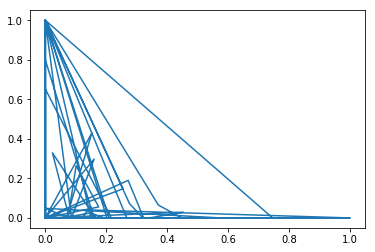

In [44]:
coord1=[pt2[i][0] for i in range(len(airportl))]
coord2=[pt2[i][1] for i in range(len(airportl))]
plt.plot(coord1,coord2)
plt.show()

Comparaison avec le Random walk. Ca marche quand le temps est très grand (1 jour)

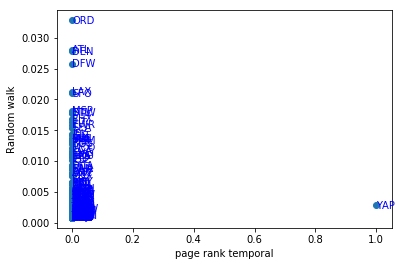

In [45]:
axes = plt.gca()
plt.plot(vectptrans,pr,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
ni=0
for i in airportl:
    text = axes.text(vectptrans[ni],pr[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

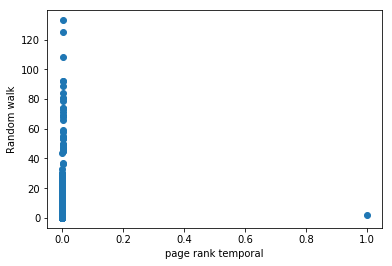

In [46]:
axes = plt.gca()
plt.plot(vectptrans,covAirports,'o')
axes.set_ylabel('Random walk')
axes.set_xlabel('page rank temporal')
plt.savefig("randwalkVStpr.pdf")
plt.show()

A partir de ça, on va calculer une autre matrice de covariance. On a plein d'échantillons dans pt2. et on peut encore en faire plus sur le temps si on veut.


2.798840440682616
1.5973333413990458
2.432882596498816
2.9724108431519354
1.3718659245489127
1.1993588146856422
3.048831538556859
0.1665726079065085
3.313989776739122
0.8755558537084969
1.16296901383883
2.5741507283722638
1.6666648023931883
0.7277778437529806
1.5973333413990458
0.9760306426429615
1.4055715607377237
1.7175016132454353
0.7906671873615461
0.6938860586516057
1.7632530496961463
0.09584427312494734
1.9159729811778894
0.5071358806153847
0.6724842563632188
1.4876173781917432
0.9631184044600162
0.4191856095900621
2.432882596498816
1.4055715607377237
2.1778135792107087
2.614970065957432
1.2043368658233051
1.0569059168995272
2.6852086361567555
0.1459147449341468
2.9152412562047596
0.771488440345014
1.0239311153741677
2.2663586420493607
1.4668185817412462
0.6402402412659709
2.9724108431519354
1.7175016132454353
2.614970065957432
3.235987805045495
1.4729731811252214
1.2872519409907464
3.278222126906321
0.17824815747826728
3.5610201872641616
0.9409191176327147
1.249325057451573
2.76

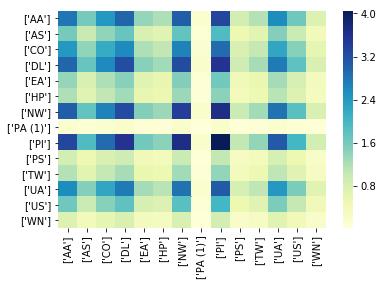

[0.27003561 0.2649745  0.26942191 0.2697178  0.26949169 0.26557234
 0.26896292 0.2610203  0.26911347 0.26304406 0.26768451 0.2697531
 0.26841428 0.26424259]
[0.27003561 0.2649745  0.26942191 0.2697178  0.26949169 0.26557234
 0.26896292 0.2610203  0.26911347 0.26304406 0.26768451 0.2697531
 0.26841428 0.26424259]


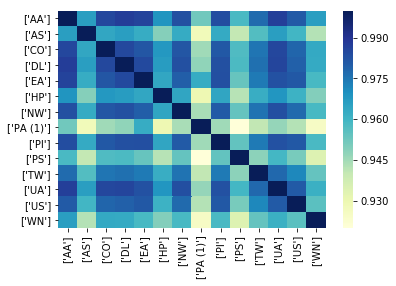

In [47]:
from math import *

matcovtemp=[[0 for j in carL] for i in carL]
avg=[0. for i in carL]

for i in range(len(carL)):
    moy=0
    for k in range(len(airportl)):
        moy+=pt2[k][i]
    avg[i]=moy/(len(carL))

for i in range(len(carL)):
    for j in range(len(carL)):
        moyprod=0
        moyi=0
        moyj=0
        for k in range(len(airportl)):
            moyprod+=(pt2[k][i]-avg[i])*(pt2[k][j]-avg[j])
        print(moyprod/(len(airportl)))
        matcovtemp[i][j]=(moyprod)/(len(pt2))

lablist=multi.giveLayersLabels()
sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)
plt.show()

for i in range(len(carL)):
    for j in range(len(carL)):
        if i!=j:
            matcovtemp[i][j]=matcovtemp[i][j]/(sqrt(matcovtemp[i][i])*sqrt(matcovtemp[j][j]))
for i in range(len(carL)):
    matcovtemp[i][i]=1

sns_plot=sns.heatmap(np.transpose(matcovtemp),cmap="YlGnBu",xticklabels=lablist,yticklabels=lablist)

vecptransC=[0 for i in carL]
for i in range(len(vecptransC)):
    for j in range(len(vecptransC)):
        vecptransC[i]+=matcovtemp[i][j]
vecptransC=valeurPropreMax(matcovtemp,1000)[1]
print(vecptransC)
print(vecptransC)

x= AA
y= AA


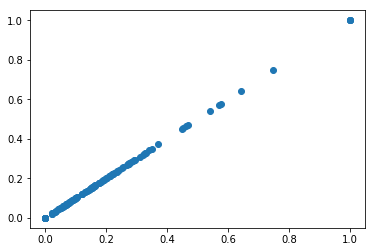

x= AA
y= AS


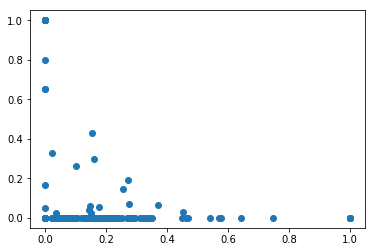

x= AA
y= CO


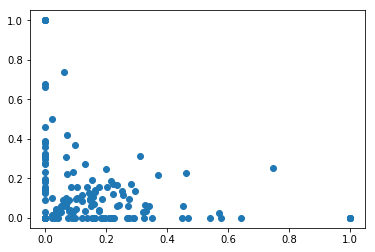

x= AA
y= DL


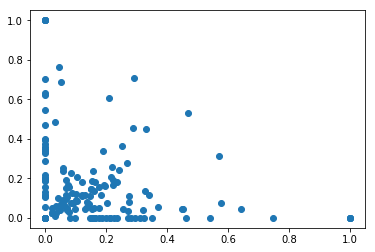

x= AA
y= EA


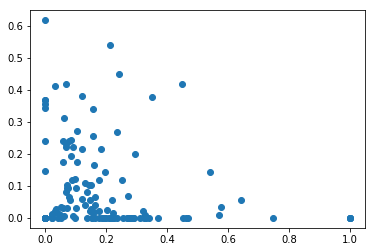

x= AA
y= HP


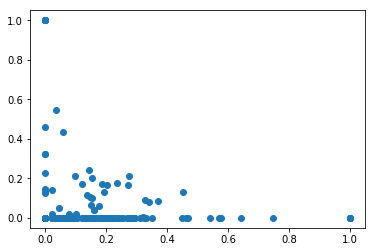

x= AA
y= NW


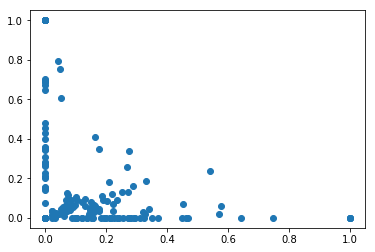

x= AA
y= PA (1)


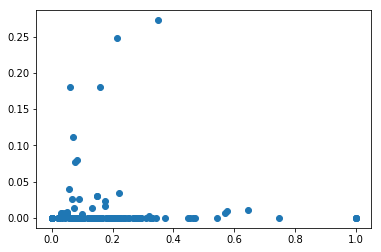

x= AA
y= PI


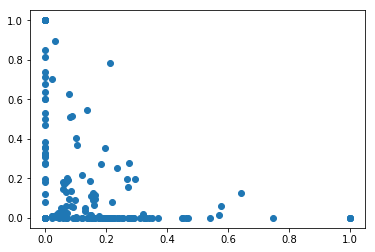

x= AA
y= PS


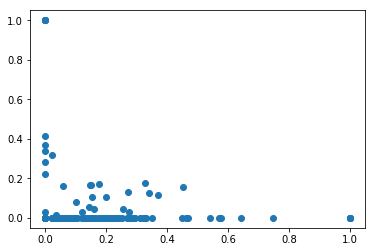

x= AA
y= TW


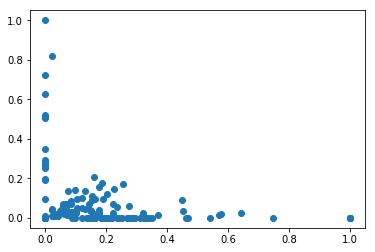

x= AA
y= UA


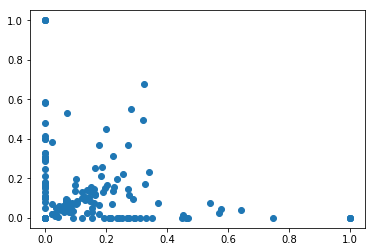

x= AA
y= US


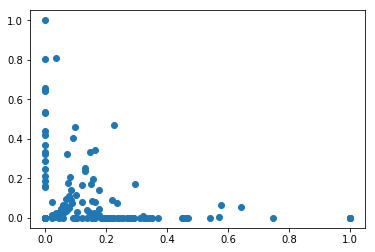

x= AA
y= WN


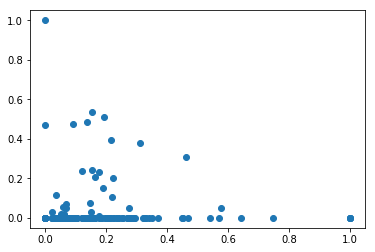

x= AS
y= AA


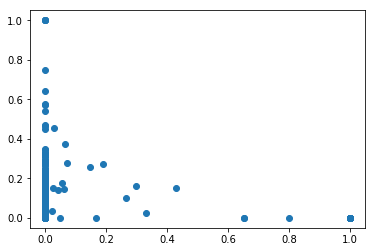

x= AS
y= AS


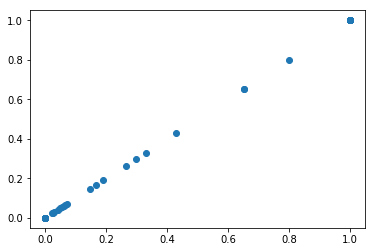

x= AS
y= CO


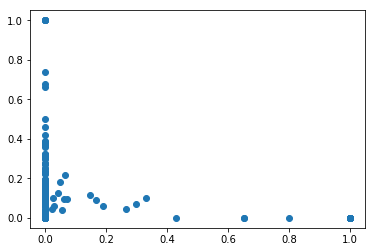

x= AS
y= DL


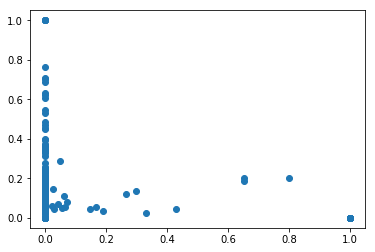

x= AS
y= EA


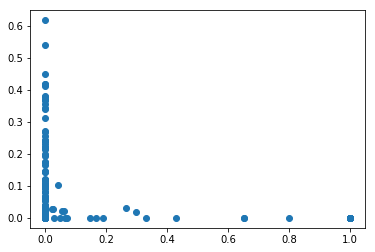

x= AS
y= HP


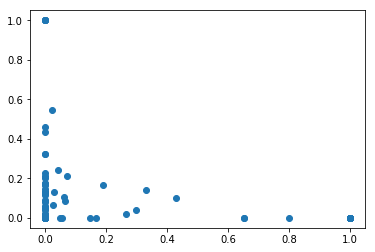

x= AS
y= NW


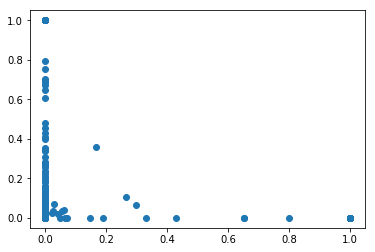

x= AS
y= PA (1)


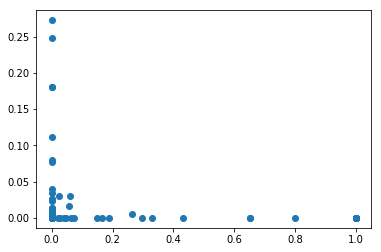

x= AS
y= PI


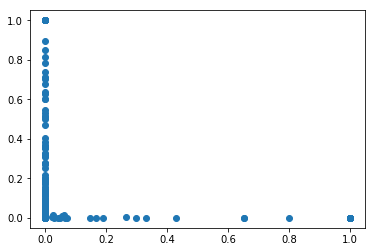

x= AS
y= PS


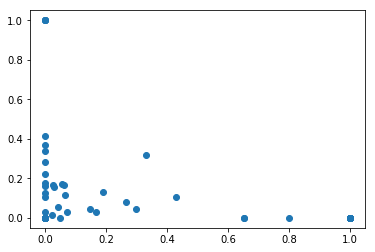

x= AS
y= TW


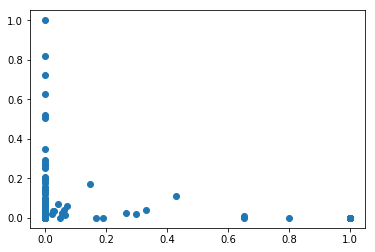

x= AS
y= UA


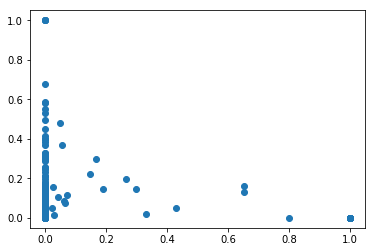

x= AS
y= US


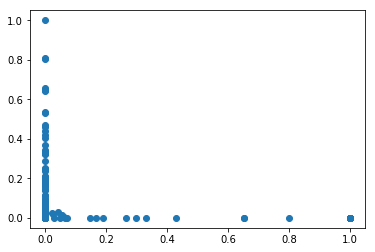

x= AS
y= WN


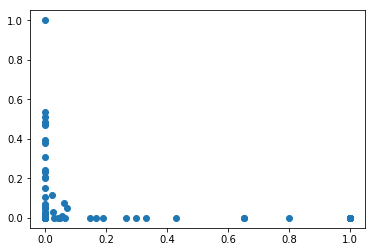

x= CO
y= AA


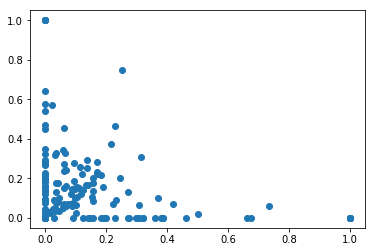

x= CO
y= AS


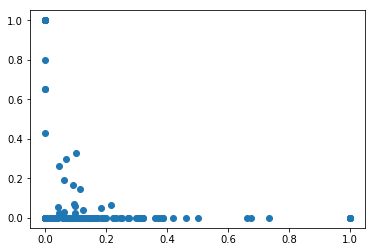

x= CO
y= CO


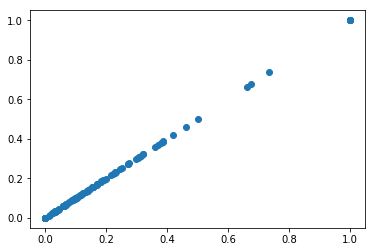

x= CO
y= DL


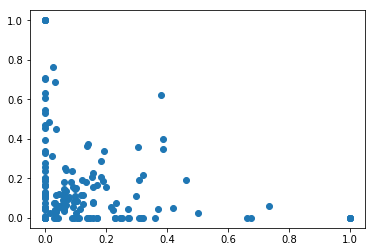

x= CO
y= EA


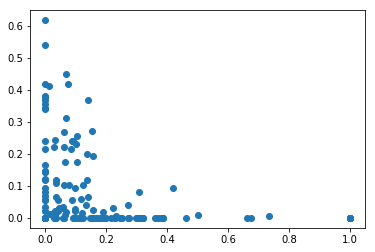

x= CO
y= HP


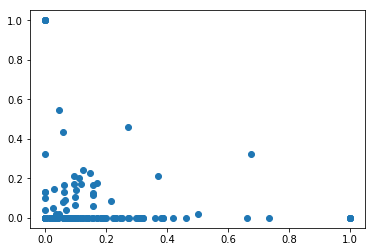

x= CO
y= NW


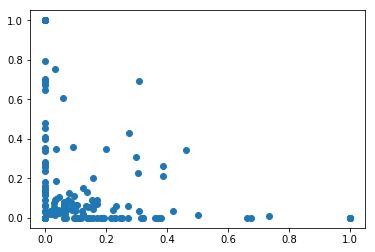

x= CO
y= PA (1)


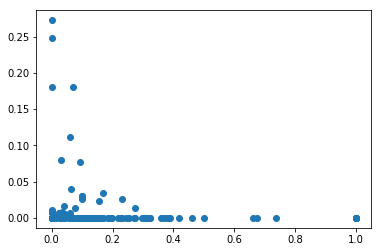

x= CO
y= PI


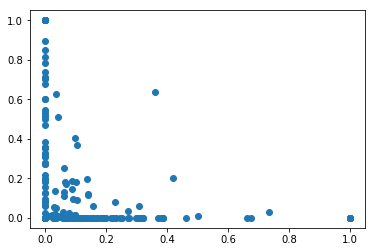

x= CO
y= PS


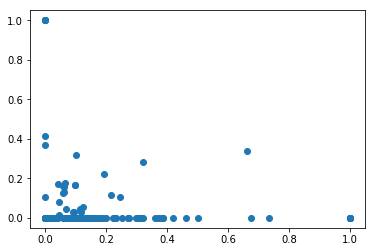

x= CO
y= TW


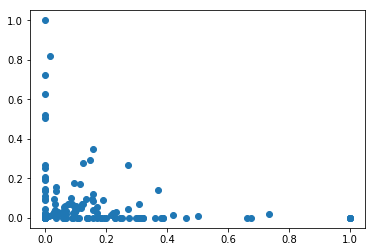

x= CO
y= UA


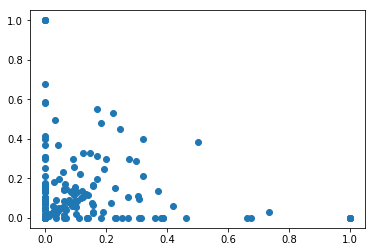

x= CO
y= US


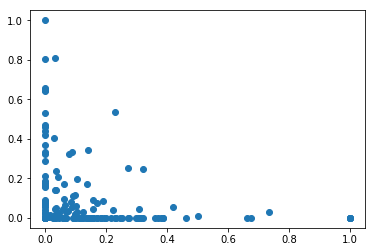

x= CO
y= WN


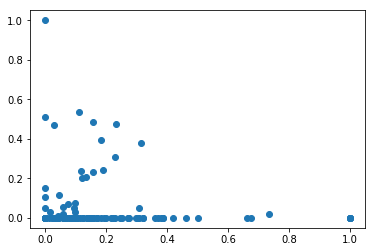

x= DL
y= AA


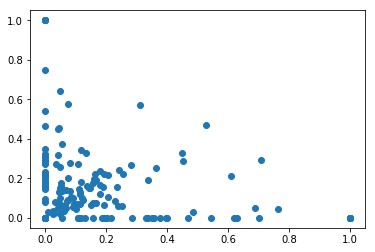

x= DL
y= AS


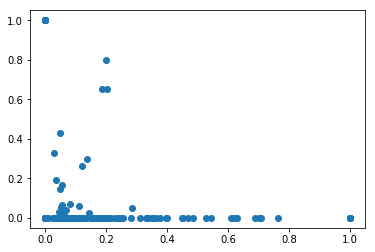

x= DL
y= CO


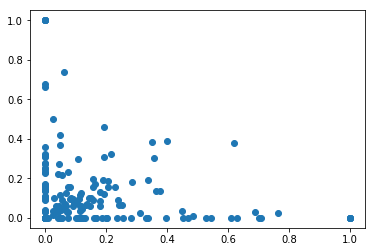

x= DL
y= DL


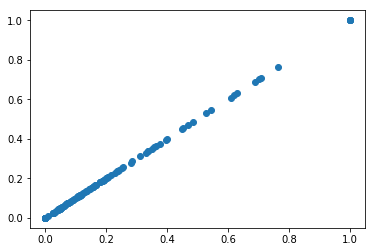

x= DL
y= EA


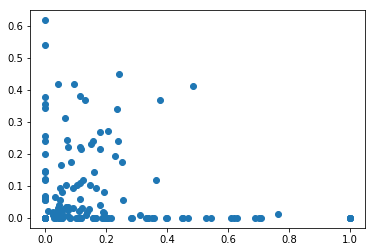

x= DL
y= HP


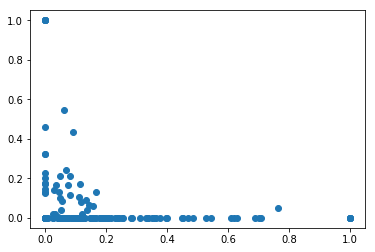

x= DL
y= NW


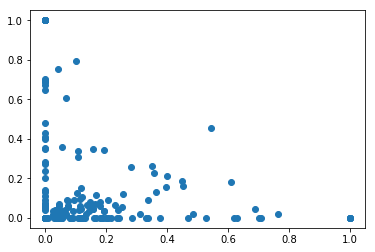

x= DL
y= PA (1)


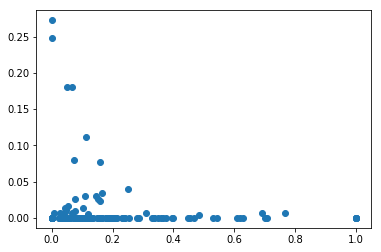

x= DL
y= PI


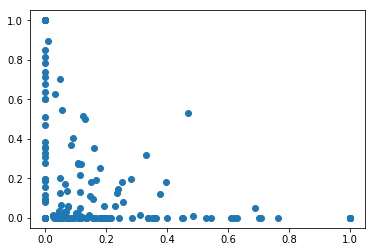

x= DL
y= PS


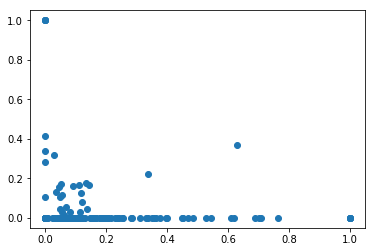

x= DL
y= TW


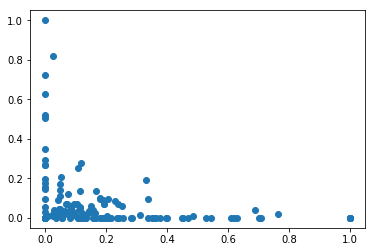

x= DL
y= UA


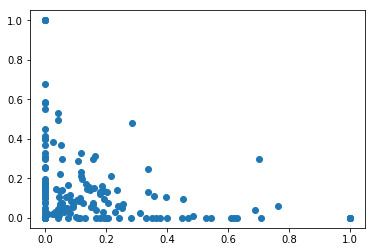

x= DL
y= US


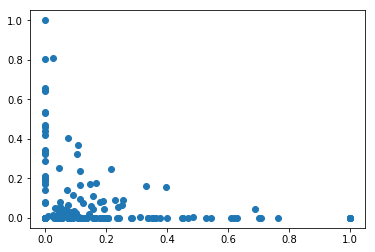

x= DL
y= WN


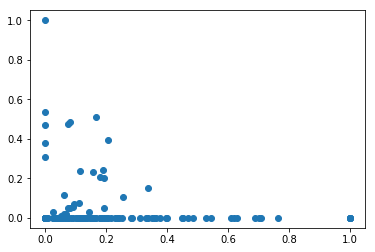

x= EA
y= AA


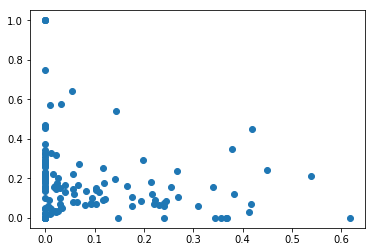

x= EA
y= AS


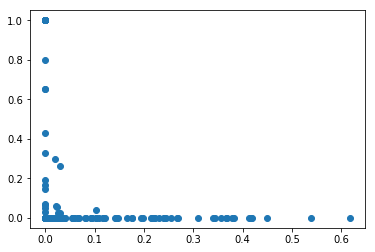

x= EA
y= CO


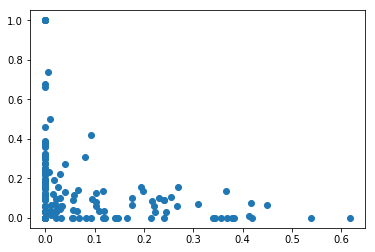

x= EA
y= DL


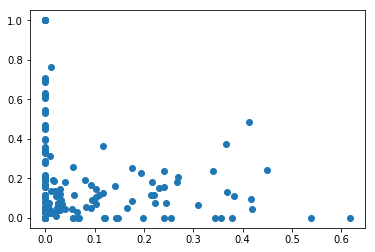

x= EA
y= EA


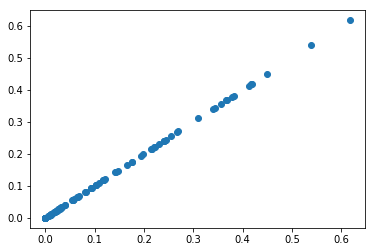

x= EA
y= HP


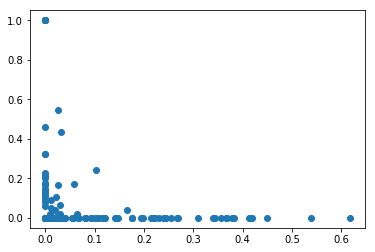

x= EA
y= NW


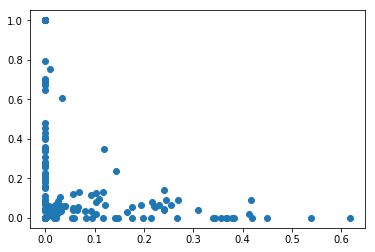

x= EA
y= PA (1)


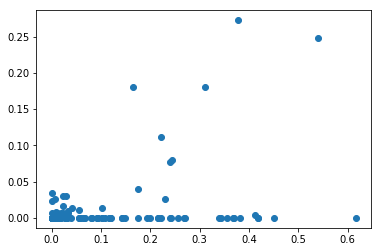

x= EA
y= PI


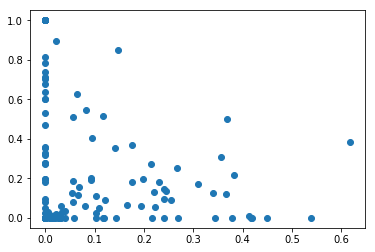

x= EA
y= PS


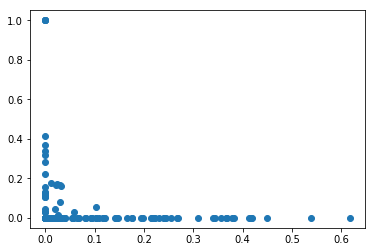

x= EA
y= TW


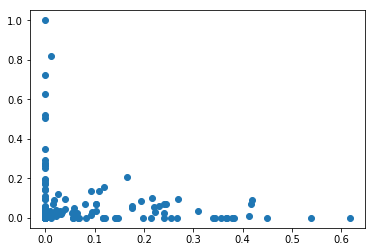

x= EA
y= UA


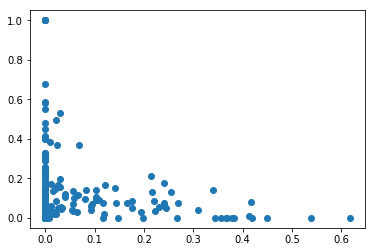

x= EA
y= US


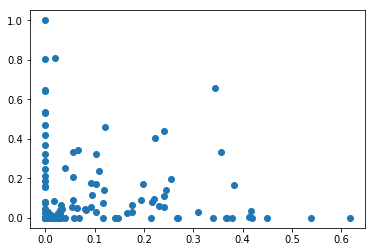

x= EA
y= WN


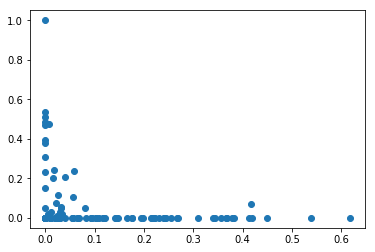

x= HP
y= AA


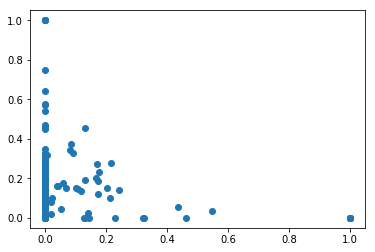

x= HP
y= AS


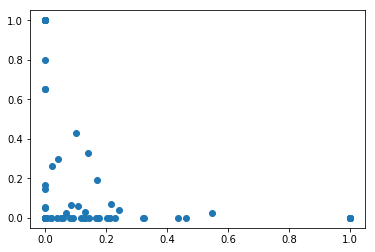

x= HP
y= CO


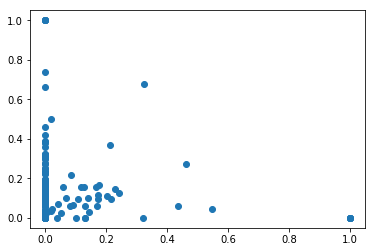

x= HP
y= DL


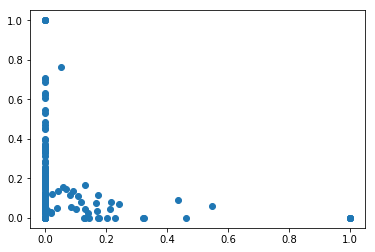

x= HP
y= EA


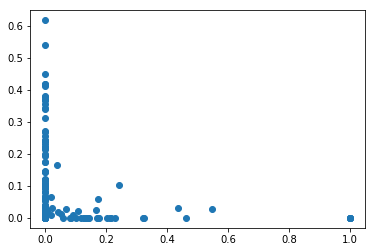

x= HP
y= HP


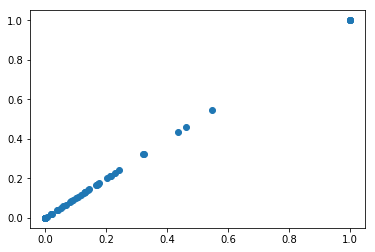

x= HP
y= NW


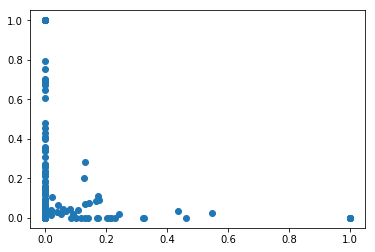

x= HP
y= PA (1)


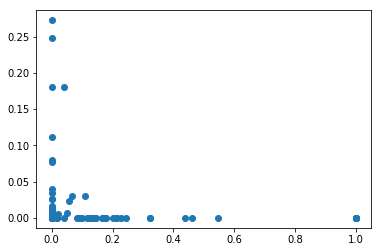

x= HP
y= PI


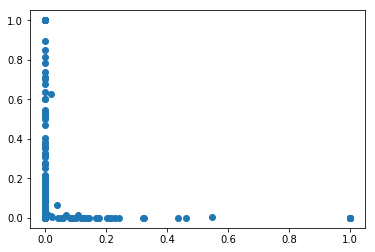

x= HP
y= PS


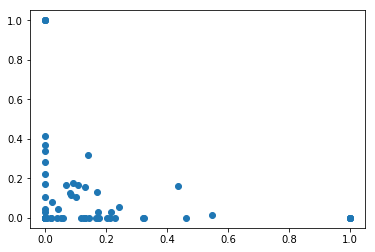

x= HP
y= TW


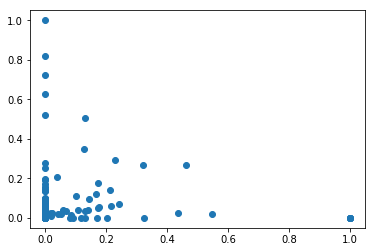

x= HP
y= UA


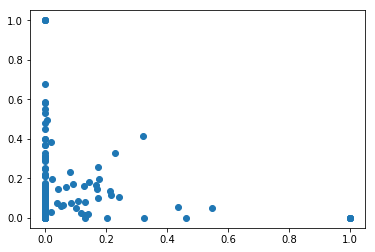

x= HP
y= US


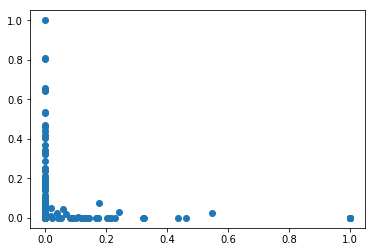

x= HP
y= WN


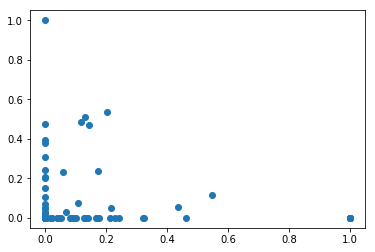

x= NW
y= AA


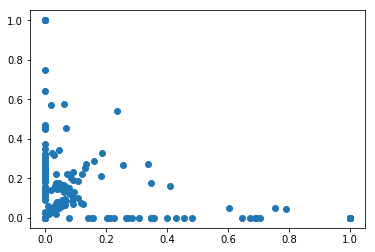

x= NW
y= AS


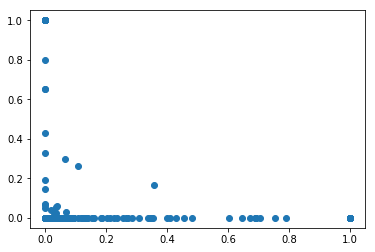

x= NW
y= CO


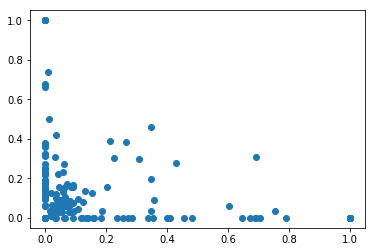

x= NW
y= DL


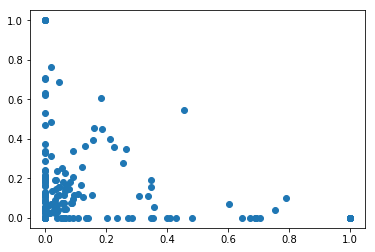

x= NW
y= EA


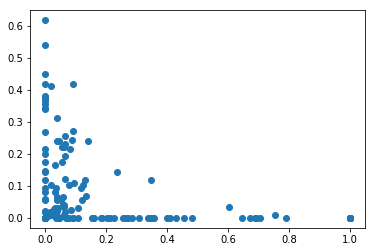

x= NW
y= HP


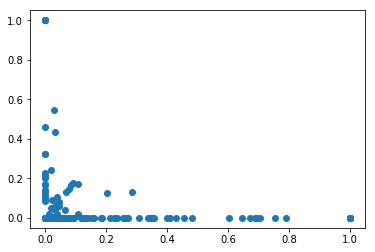

x= NW
y= NW


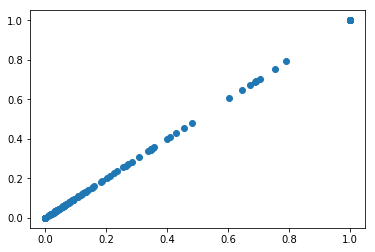

x= NW
y= PA (1)


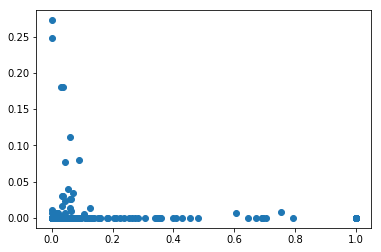

x= NW
y= PI


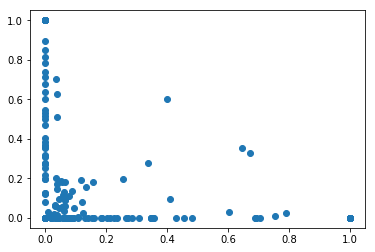

x= NW
y= PS


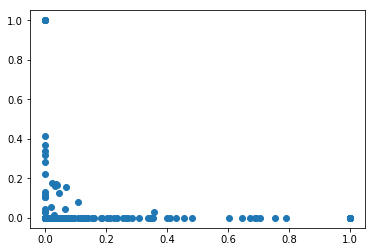

x= NW
y= TW


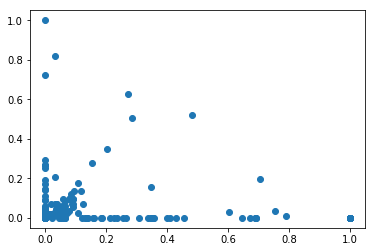

x= NW
y= UA


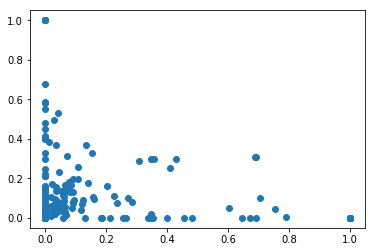

x= NW
y= US


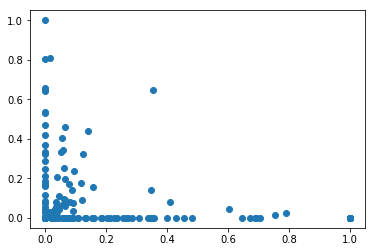

x= NW
y= WN


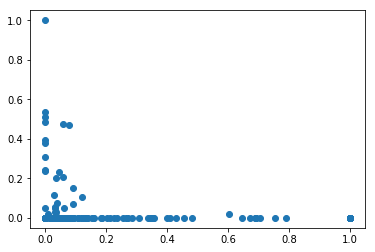

x= PA (1)
y= AA


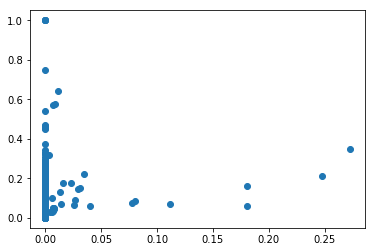

x= PA (1)
y= AS


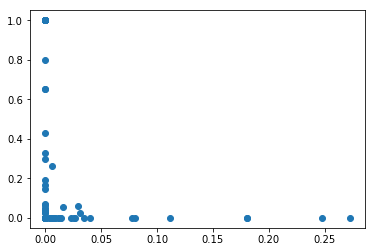

x= PA (1)
y= CO


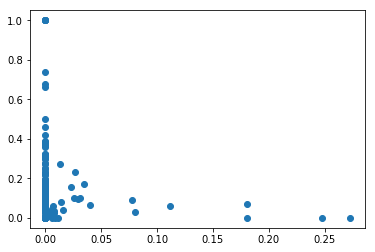

x= PA (1)
y= DL


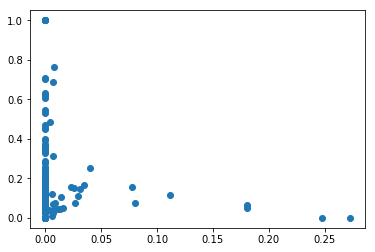

x= PA (1)
y= EA


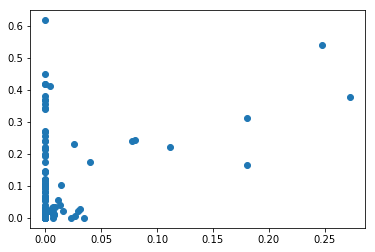

x= PA (1)
y= HP


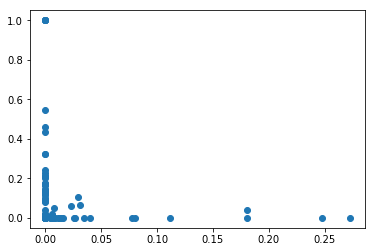

x= PA (1)
y= NW


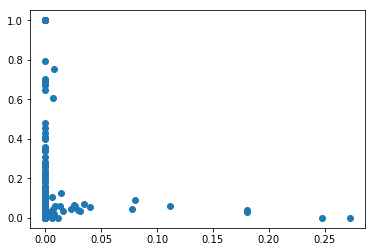

x= PA (1)
y= PA (1)


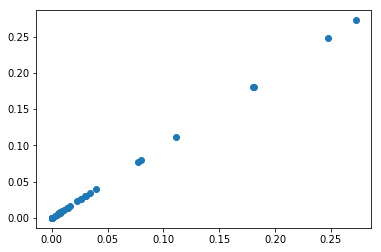

x= PA (1)
y= PI


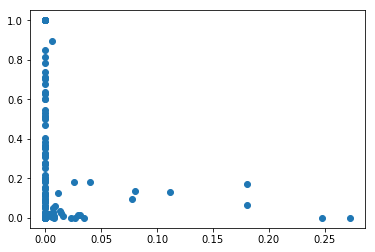

x= PA (1)
y= PS


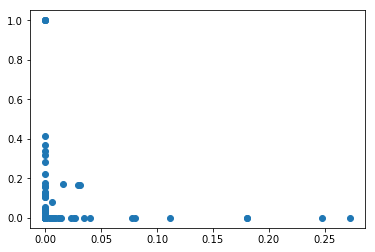

x= PA (1)
y= TW


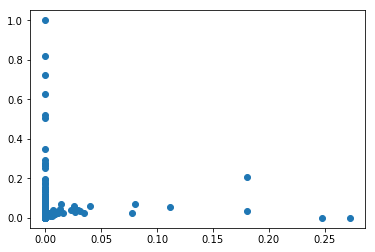

x= PA (1)
y= UA


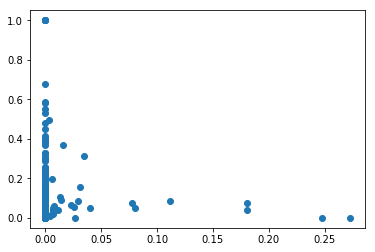

x= PA (1)
y= US


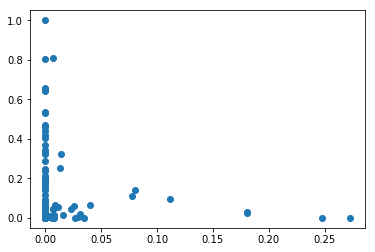

x= PA (1)
y= WN


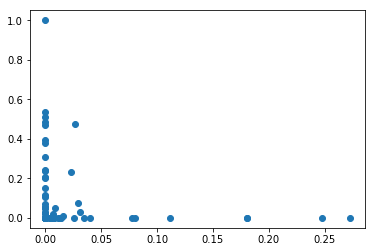

x= PI
y= AA


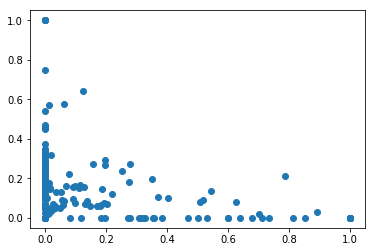

x= PI
y= AS


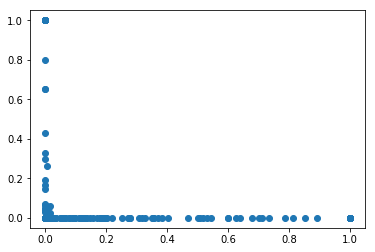

x= PI
y= CO


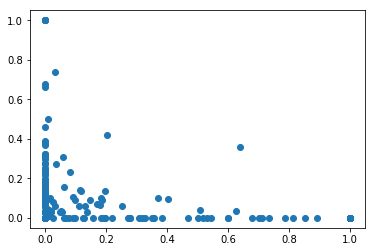

x= PI
y= DL


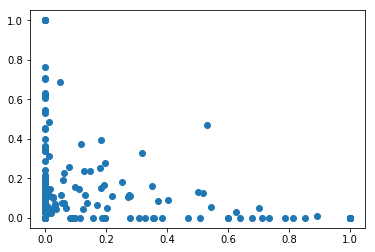

x= PI
y= EA


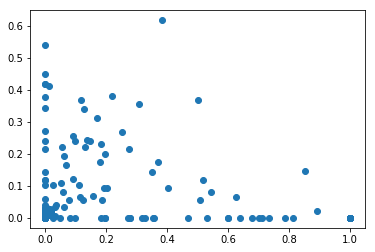

x= PI
y= HP


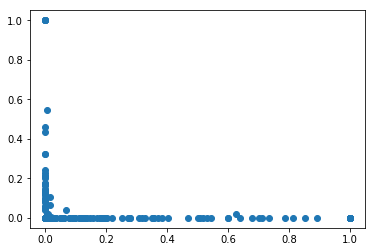

x= PI
y= NW


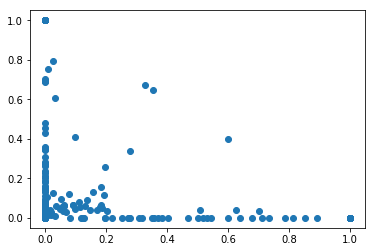

x= PI
y= PA (1)


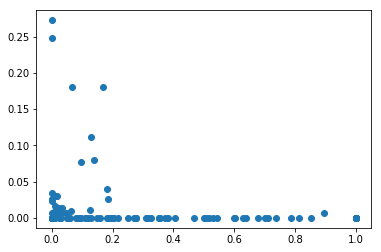

x= PI
y= PI


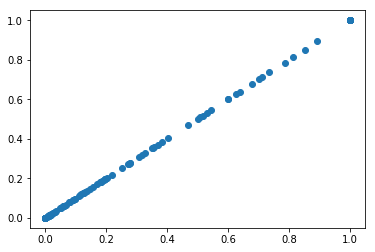

x= PI
y= PS


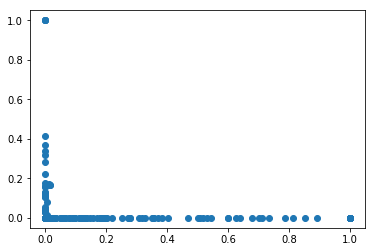

x= PI
y= TW


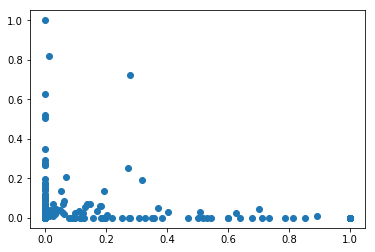

x= PI
y= UA


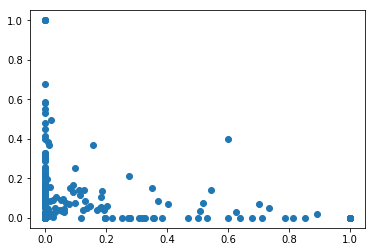

x= PI
y= US


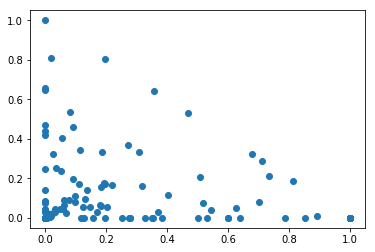

x= PI
y= WN


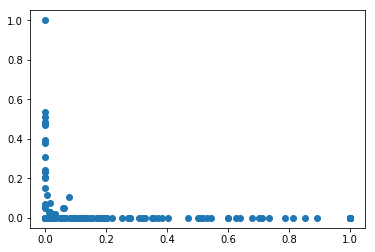

x= PS
y= AA


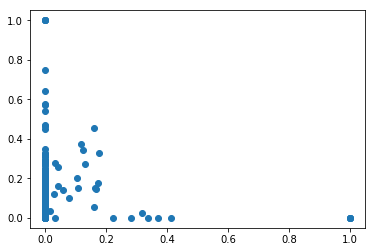

x= PS
y= AS


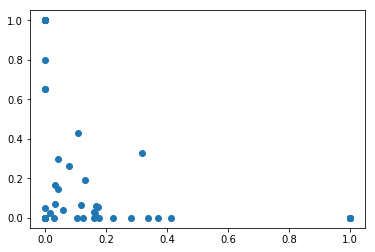

x= PS
y= CO


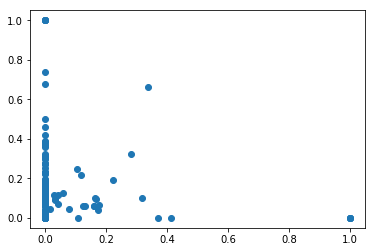

x= PS
y= DL


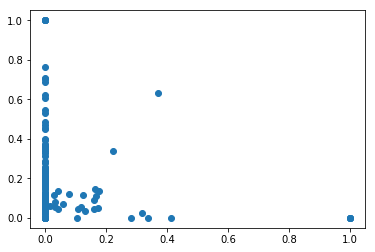

x= PS
y= EA


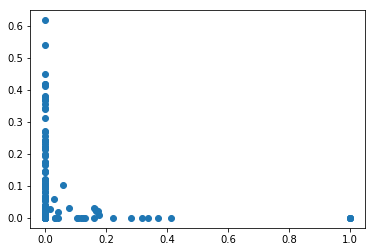

x= PS
y= HP


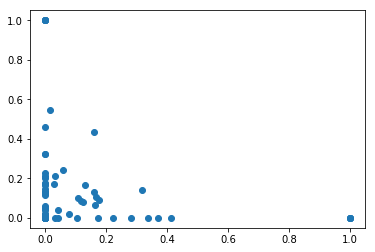

x= PS
y= NW


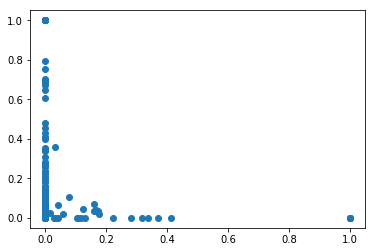

x= PS
y= PA (1)


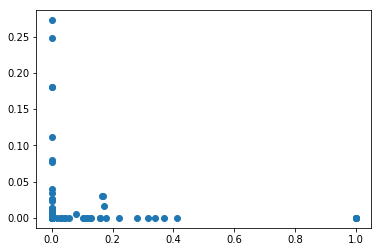

x= PS
y= PI


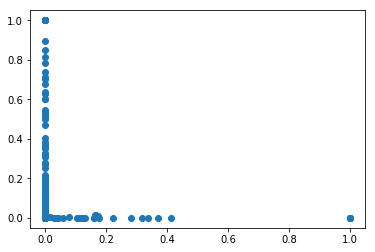

x= PS
y= PS


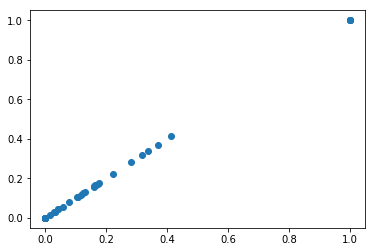

x= PS
y= TW


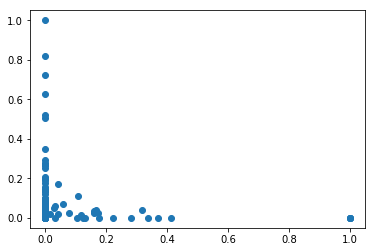

x= PS
y= UA


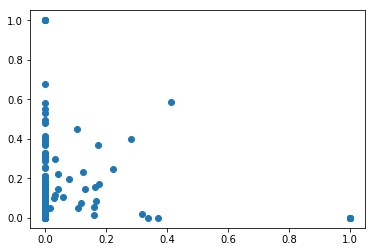

x= PS
y= US


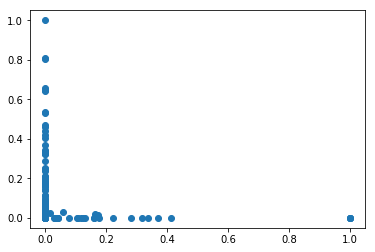

x= PS
y= WN


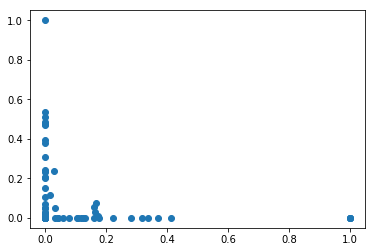

x= TW
y= AA


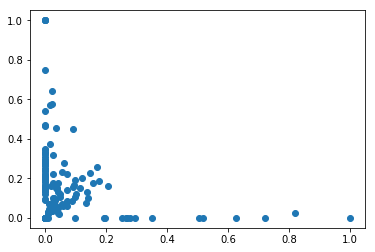

x= TW
y= AS


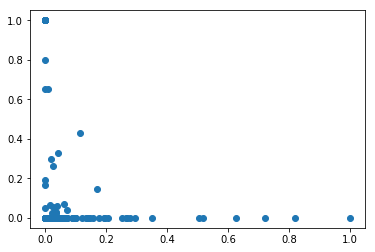

x= TW
y= CO


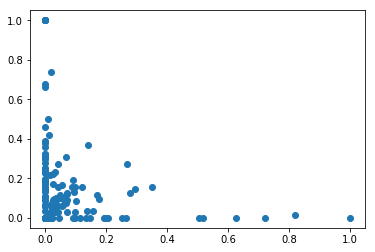

x= TW
y= DL


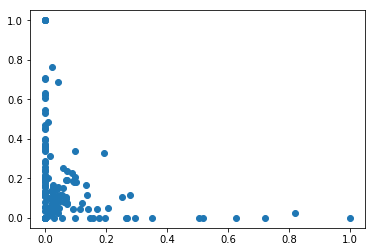

x= TW
y= EA


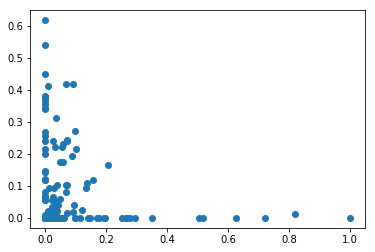

x= TW
y= HP


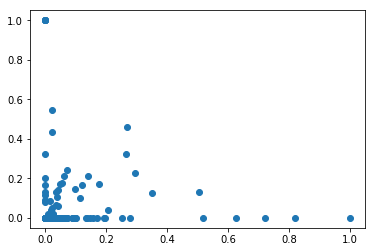

x= TW
y= NW


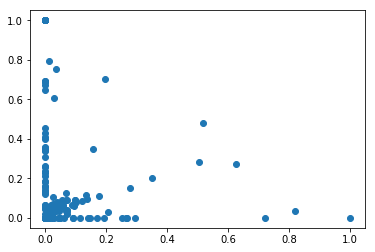

x= TW
y= PA (1)


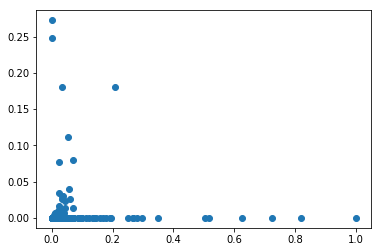

x= TW
y= PI


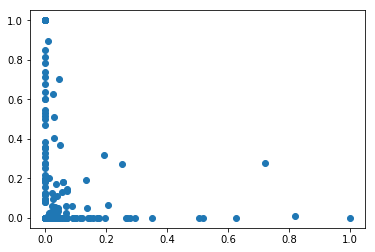

x= TW
y= PS


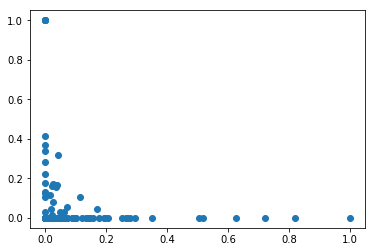

x= TW
y= TW


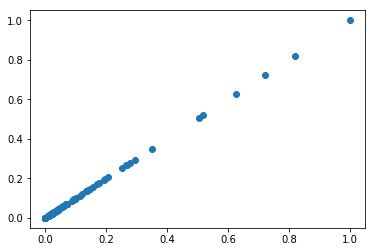

x= TW
y= UA


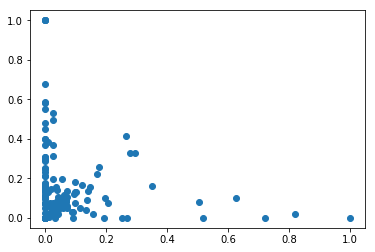

x= TW
y= US


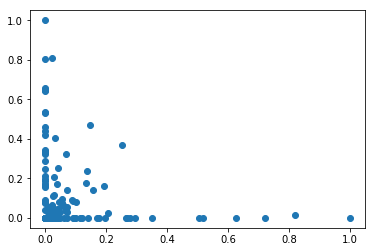

x= TW
y= WN


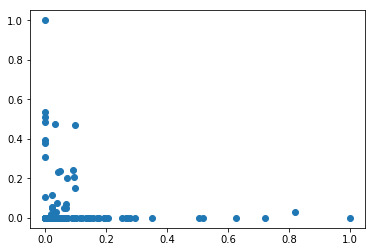

x= UA
y= AA


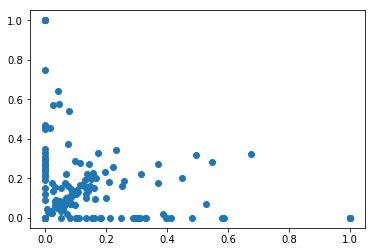

x= UA
y= AS


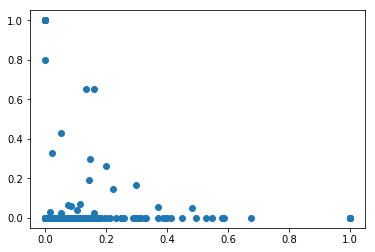

x= UA
y= CO


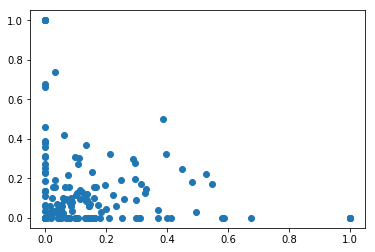

x= UA
y= DL


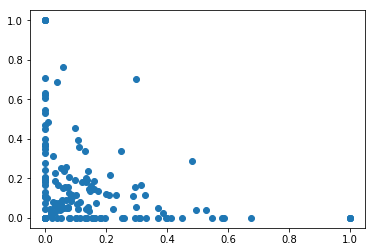

x= UA
y= EA


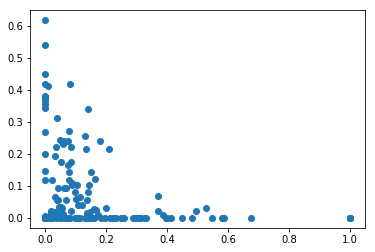

x= UA
y= HP


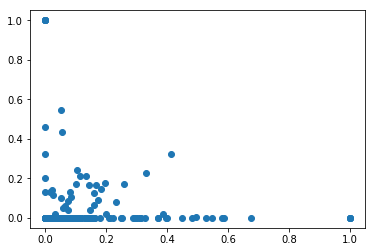

x= UA
y= NW


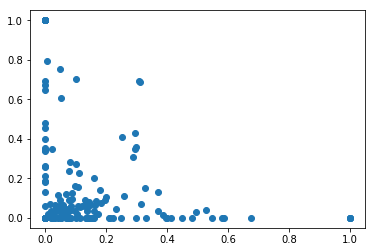

x= UA
y= PA (1)


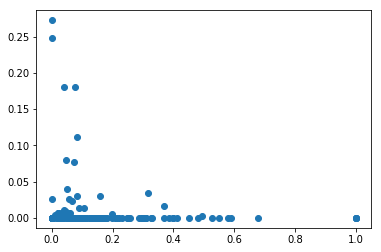

x= UA
y= PI


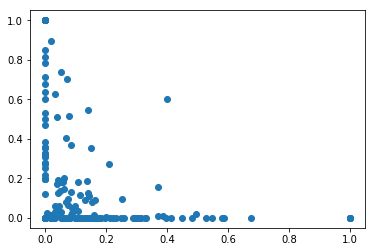

x= UA
y= PS


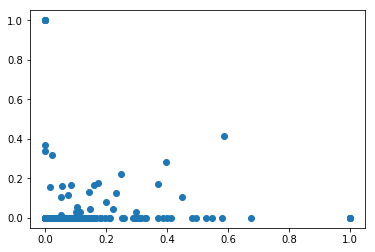

x= UA
y= TW


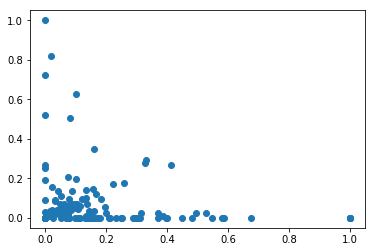

x= UA
y= UA


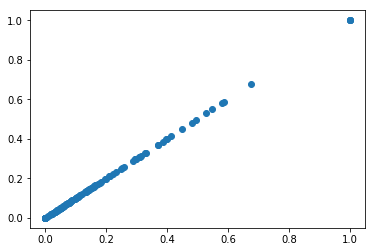

x= UA
y= US


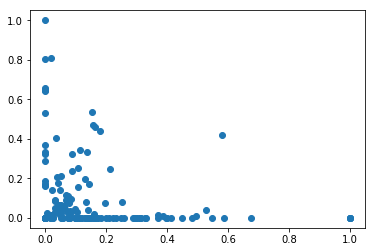

x= UA
y= WN


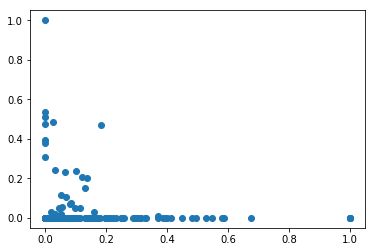

x= US
y= AA


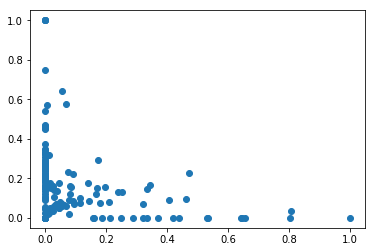

x= US
y= AS


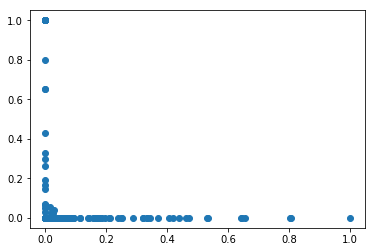

x= US
y= CO


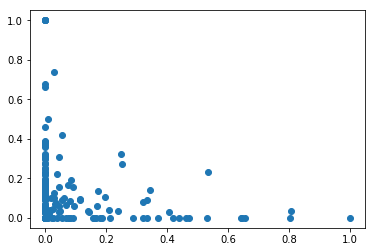

x= US
y= DL


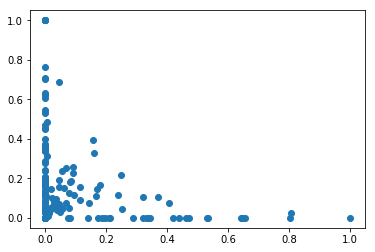

x= US
y= EA


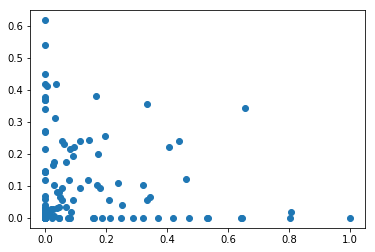

x= US
y= HP


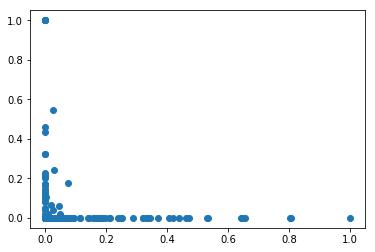

x= US
y= NW


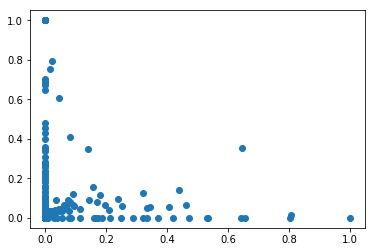

x= US
y= PA (1)


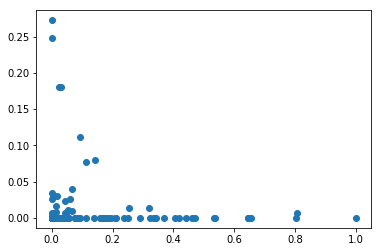

x= US
y= PI


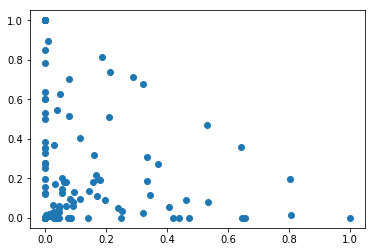

x= US
y= PS


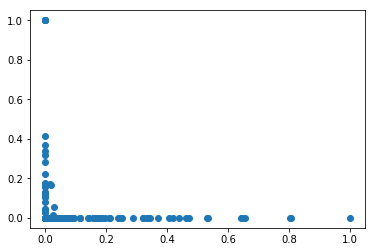

x= US
y= TW


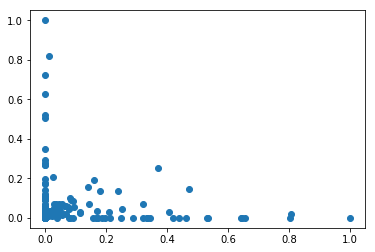

x= US
y= UA


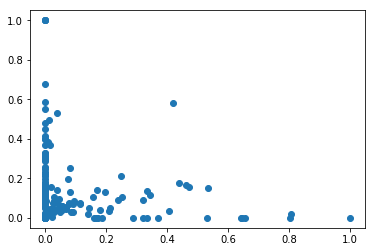

x= US
y= US


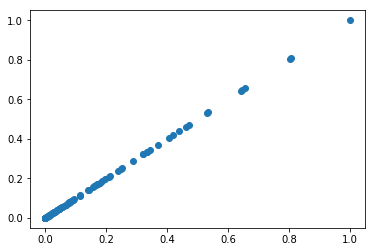

x= US
y= WN


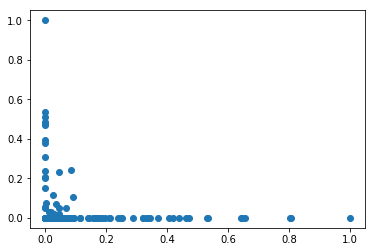

x= WN
y= AA


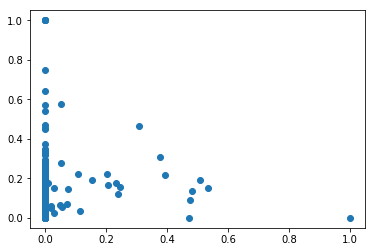

x= WN
y= AS


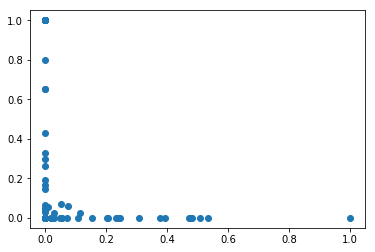

x= WN
y= CO


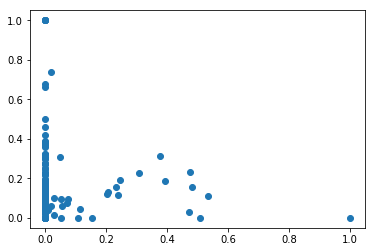

x= WN
y= DL


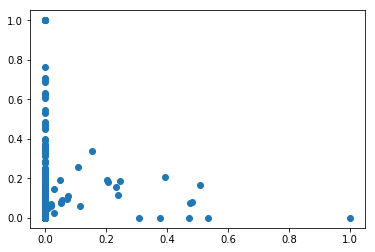

x= WN
y= EA


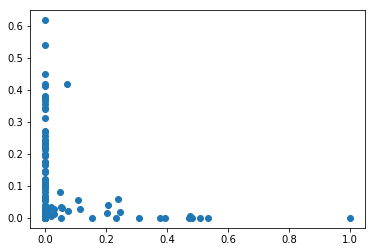

x= WN
y= HP


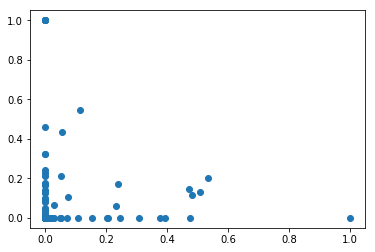

x= WN
y= NW


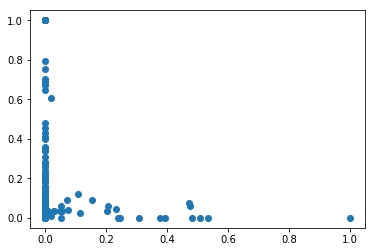

x= WN
y= PA (1)


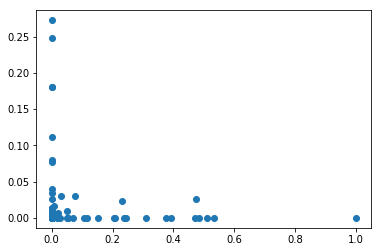

x= WN
y= PI


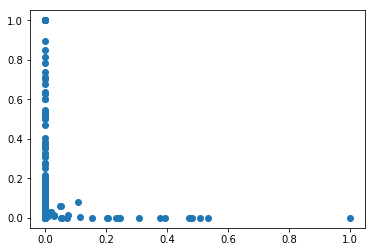

x= WN
y= PS


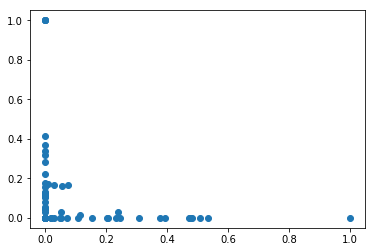

x= WN
y= TW


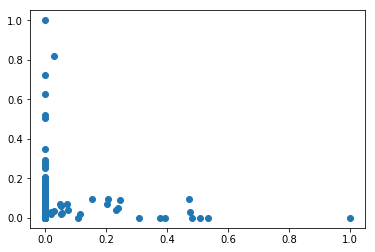

x= WN
y= UA


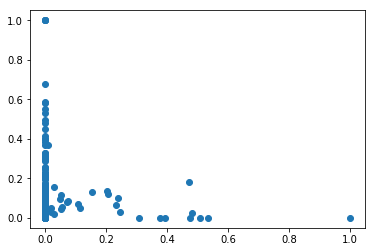

x= WN
y= US


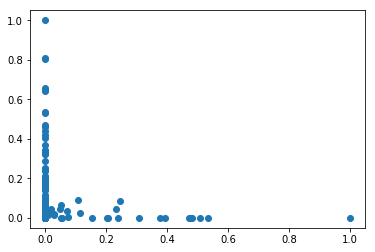

x= WN
y= WN


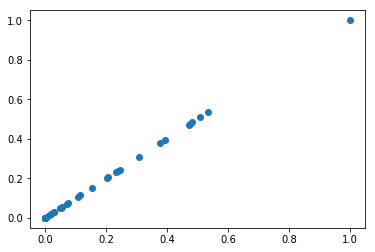

In [48]:


for k in range(len(carL)):
    for j in range(len(carL)):
        print("x=",carL[k])
        print("y=",carL[j])
        coord1=[pt2[i][k] for i in range(len(airportl))]
        coord2=[pt2[i][j] for i in range(len(airportl))]
        plt.plot(coord1,coord2,'o')
        plt.show()

[455, 111, 390, 461, 307, 146, 437, 46, 435, 66, 257, 390, 338, 144]


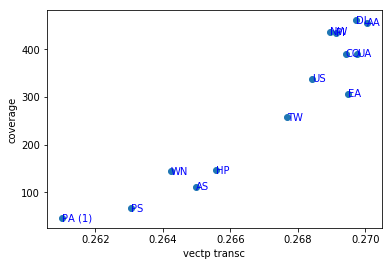

In [49]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
plt.plot(vecptransC,cov3,'o')
axes.set_ylabel('coverage')
axes.set_xlabel('vectp transc')
print(cov3)
ni=0
for i in carL:
    text = axes.text(vecptransC[ni],cov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

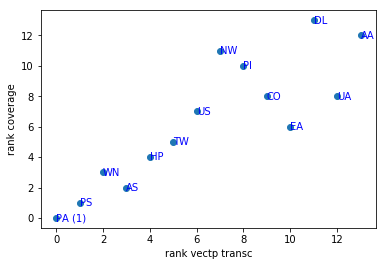

In [50]:
vecptransordo=sorted(vecptransC)
cov3ordo=sorted(cov3)
ordrevecptrans=[vecptransordo.index(vecptransC[i]) for i in range(len(vecptransC))]
ordrecov3=[cov3ordo.index(cov3[i]) for i in range(len(cov3))]
plt.plot(ordrevecptrans,ordrecov3,'o')
axes=plt.gca()
axes.set_ylabel('rank coverage')
axes.set_xlabel('rank vectp transc')
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

[[0.85714286]] [0.85714286]


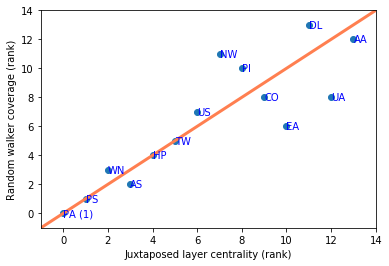

0.5358843267551381


In [51]:
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import random

#----------------------------------------------------------------------------------------#
# Step 1: training data

X = ordrevecptrans
Y = ordrecov3

X = np.asarray(X)
Y = np.asarray(Y)

X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

plt.scatter(X,Y)

#----------------------------------------------------------------------------------------#
# Step 2: define and train a model

model = linear_model.LinearRegression()
model.fit(X, Y)

print(model.coef_, model.intercept_)

#----------------------------------------------------------------------------------------#
# Step 3: prediction

x_new_min = -1.0
x_new_max = 17.0

X_NEW = np.linspace(x_new_min, x_new_max, 100)
X_NEW = X_NEW[:,np.newaxis]

#Y_NEW = [model.predict(X_NEW)]
Y_NEW=X_NEW #without prediction : x=y

plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)


plt.xlim(-1,14)
plt.ylim(-1,14)

#plt.title("Simple Linear Regression using scikit-learn and python 3",fontsize=10)
plt.xlabel('Juxtaposed layer centrality (rank)')
plt.ylabel('Random walker coverage (rank)')

axes=plt.gca()
ni=0
for i in carL:
    text = axes.text(ordrevecptrans[ni],ordrecov3[ni],i,ha="left", va="center", color="b")
    ni=ni+1

plt.savefig("simple_linear_regression1988.pdf", bbox_inches='tight')
plt.show()

#step 4 score 

s=0
for i in range(len(X)):
    s=s+(Y[i]-X[i]*model.coef_-model.intercept_)**2

print(sqrt(s)/(len(X)))

# Nombre de vols par compagnies

NameError: name 'nbvols' is not defined

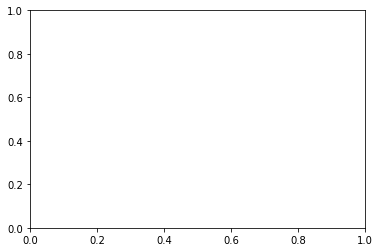

In [52]:
cov3=[covCompagnies[i] for i in range(len(carL))]
axes=plt.gca()
#plt.plot(nbvols,cov3,'o')
plt.plot(nbvols,vecptransC,'o')
axes.set_ylabel('vecptransC')
axes.set_xlabel('nbvols')
print(cov3)
ni=0
for i in carL:
    text = axes.text(nbvols[ni],vecptransC[ni],i,ha="left", va="center", color="b")
    ni=ni+1
plt.show()

In [ ]:
nbvols=[0 for i in carL]

for link in m.giveLinks().giveListOfLinks():
    nbVols=(len(link.giveIntervals()))
    carIndex=carL.index(link.giveLabel()[2][0])
    nbvols[carIndex]=nbvols[carIndex]+nbVols

print(nbvols)
print(carL)
tot=0
for i in range(len(nbvols)):
    tot=tot+nbvols[i]
print(tot)
plt.plot(carL,nbvols,'o')
plt.show()